# Exploratory Data Analysis (EDA) 

## Load the file

In [57]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep="|")
# df.columns
df.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9472\3279153326.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data Structure

In [58]:
df.shape


(1000098, 52)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## missing values

In [60]:
df.isnull().sum()[df.isnull().sum() > 0]

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

### 🚨 Columns that are basically unusable:

CrossBorder → 999,400 missing (~99%)

NumberOfVehiclesInFleet → 100% missing

CustomValueEstimate → 779,642 missing (~78%)

### 😊 Columns that are mostly fine:

Gender missing only 9,536 out of ~1M (only 0.9%)

MaritalStatus missing 8,259 (0.8%)

## Convert Data Types

In [61]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
bool_cols = ['IsVATRegistered','NewVehicle','WrittenOff','Rebuilt','Converted','CrossBorder']

for col in bool_cols:
    df[col] = df[col].astype("bool")

numeric_cols = ['RegistrationYear','Cylinders','cubiccapacity','kilowatts','CustomValueEstimate',
                'CapitalOutstanding','SumInsured','CalculatedPremiumPerTerm',
                'TotalPremium','TotalClaims']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


## Descriptive Statistics (Numerical)

In [62]:
df[numeric_cols].describe()


,RegistrationYear,Cylinders,cubiccapacity,kilowatts,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,999546.000000,999546.000000,999546.000000,2.204560e+05,999776.000000,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,2.010225e+03,4.046642,2466.743258,97.207919,2.255311e+05,52605.220796,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,3.261391e+00,0.294020,442.800640,19.393256,5.645157e+05,111417.190825,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.987000e+03,0.000000,0.000000,0.000000,2.000000e+04,-2.000000,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,2.008000e+03,4.000000,2237.000000,75.000000,1.350000e+05,0.000000,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,2.011000e+03,4.000000,2694.000000,111.000000,2.200000e+05,0.000000,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,2.013000e+03,4.000000,2694.000000,111.000000,2.800000e+05,0.000000,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,2.015000e+03,10.000000,12880.000000,309.000000,2.655000e+07,700000.000000,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## Variability Measures (Standard Deviation, Variance, Range)

In [63]:
variability = pd.DataFrame({
    'mean': df[numeric_cols].mean(),
    'std': df[numeric_cols].std(),
    'var': df[numeric_cols].var(),
    'min': df[numeric_cols].min(),
    'max': df[numeric_cols].max(),
    'range': df[numeric_cols].max() - df[numeric_cols].min()
})

variability


,mean,std,var,min,max,range
RegistrationYear,2010.225371,3.261391e+00,1.063667e+01,1987.000000,2.015000e+03,2.800000e+01
Cylinders,4.046642,2.940201e-01,8.644783e-02,0.000000,1.000000e+01,1.000000e+01
cubiccapacity,2466.743258,4.428006e+02,1.960724e+05,0.000000,1.288000e+04,1.288000e+04
kilowatts,97.207919,1.939326e+01,3.760984e+02,0.000000,3.090000e+02,3.090000e+02
CustomValueEstimate,225531.129942,5.645157e+05,3.186780e+11,20000.000000,2.655000e+07,2.653000e+07
CapitalOutstanding,52605.220796,1.114172e+05,1.241379e+10,-2.000000,7.000000e+05,7.000020e+05
SumInsured,604172.732589,1.508332e+06,2.275065e+12,0.010000,1.263620e+07,1.263620e+07
CalculatedPremiumPerTerm,117.875691,3.997017e+02,1.597615e+05,0.000000,7.442217e+04,7.442217e+04
TotalPremium,61.905496,2.302845e+02,5.303096e+04,-782.576754,6.528260e+04,6.606518e+04
TotalClaims,64.861190,2.384075e+03,5.683812e+06,-12002.412281,3.930921e+05,4.050945e+05


## Categorical Summary

In [64]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


Index(['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
       'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType',
       'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType'],
      dtype='object')

In [65]:
for col in categorical_cols:
    print(f"---- {col} ----")
    print(df[col].value_counts(dropna=False).head(10))
    print("\n")


---- Citizenship ----
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64


---- LegalType ----
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64


---- Title ----
Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64


---- Language ----
Language
English    1000098
Name: count, dtype: int64


---- Bank ----
Bank
First National Bank    260811
ABSA Bank              204954
Standard Bank          181715
NaN                    145961
Nedbank                132003
Capitec Bank            58155
RMB Private Bank        12576
Ithala Bank              1730
Investec Bank             732
Old Mutual                688
Name: count, dtype: int64


---- AccountType ----
AccountType
Current account         597938
Savings account         358207
NaN             

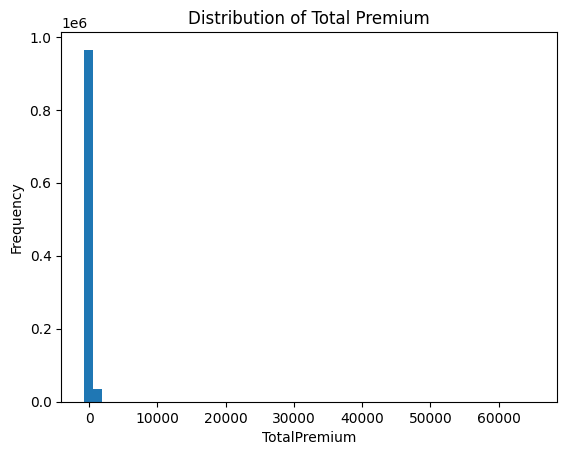

In [66]:
import matplotlib.pyplot as plt
df['TotalPremium'] = df['TotalPremium'].round(2)

df['TotalPremium'].plot(kind='hist', bins=50)
plt.title("Distribution of Total Premium")
plt.xlabel("TotalPremium")
plt.show()


## UNIVARIATE ANALYSIS

In [67]:
# Identify column types
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','bool']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Categorical Columns: ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


### Histograms for Numerical Variables

In [68]:
# Set visual style
sns.set(style="whitegrid")

# Plot histograms
df[numeric_cols].hist(figsize=(18, 18), bins=40, edgecolor='black')
plt.suptitle("Histograms for Numerical Variables", fontsize=16)
plt.show()


NameError: name 'sns' is not defined

## Bar Charts for Categorical Variables

<Figure size 1200x600 with 0 Axes>

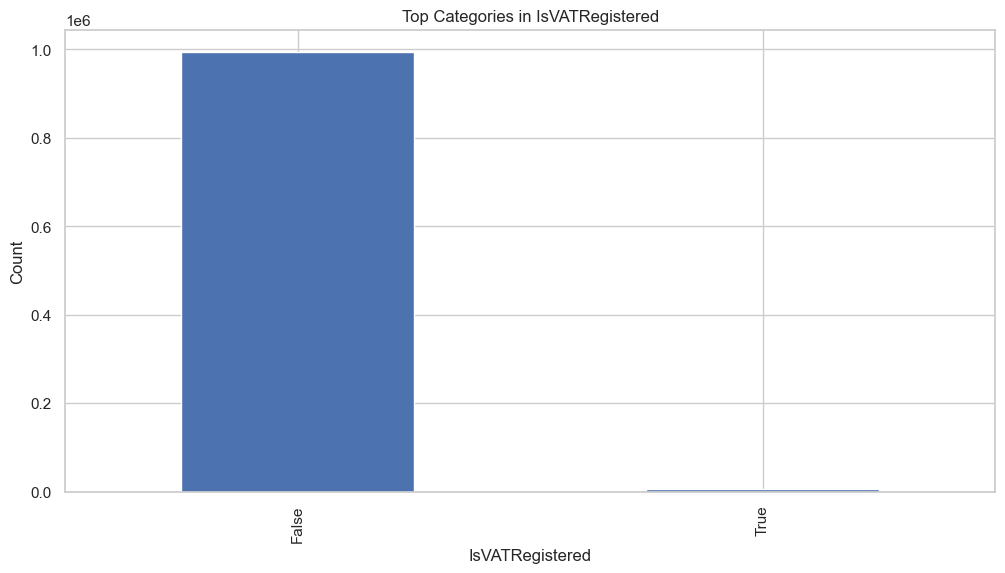

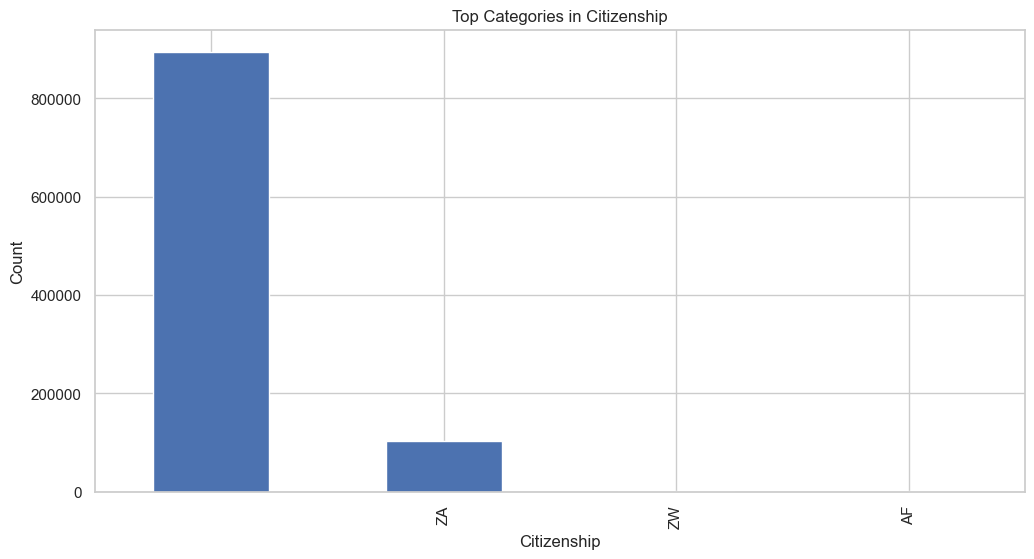

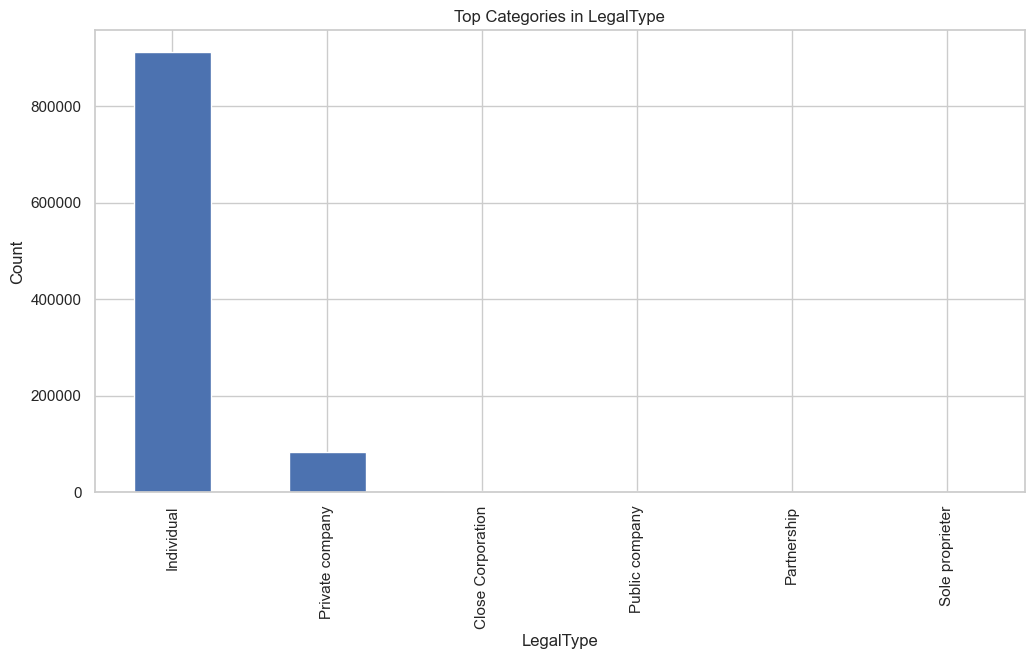

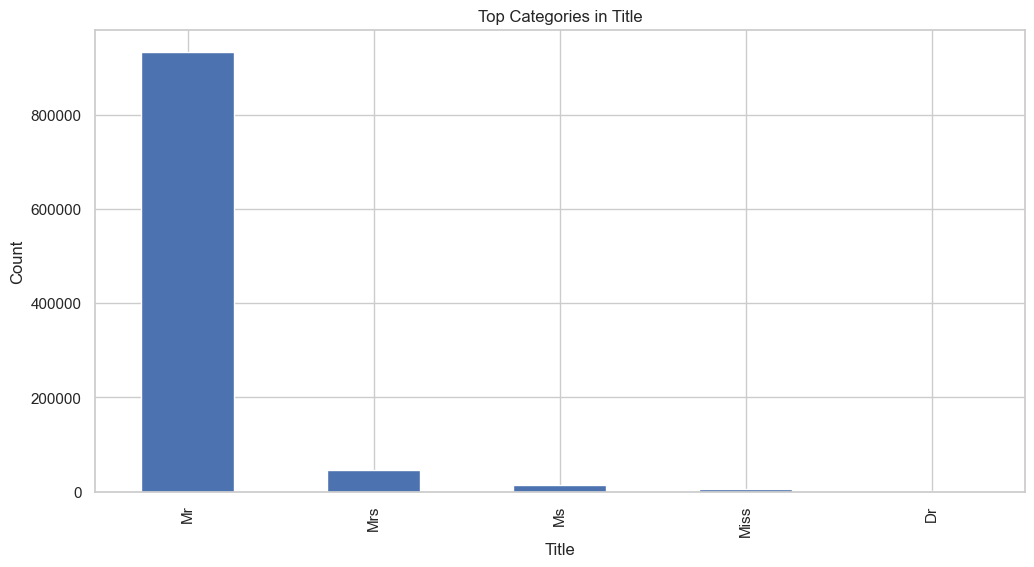

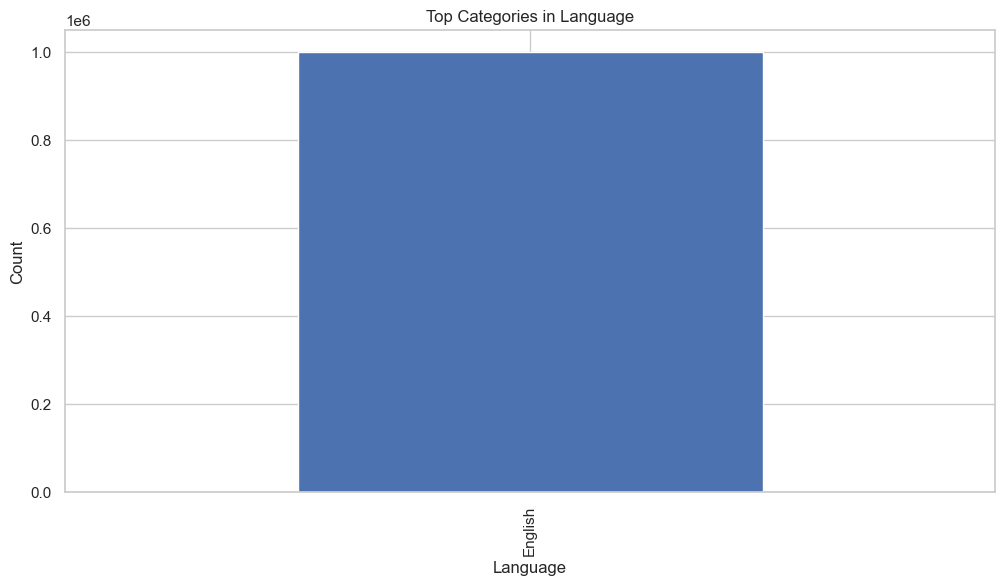

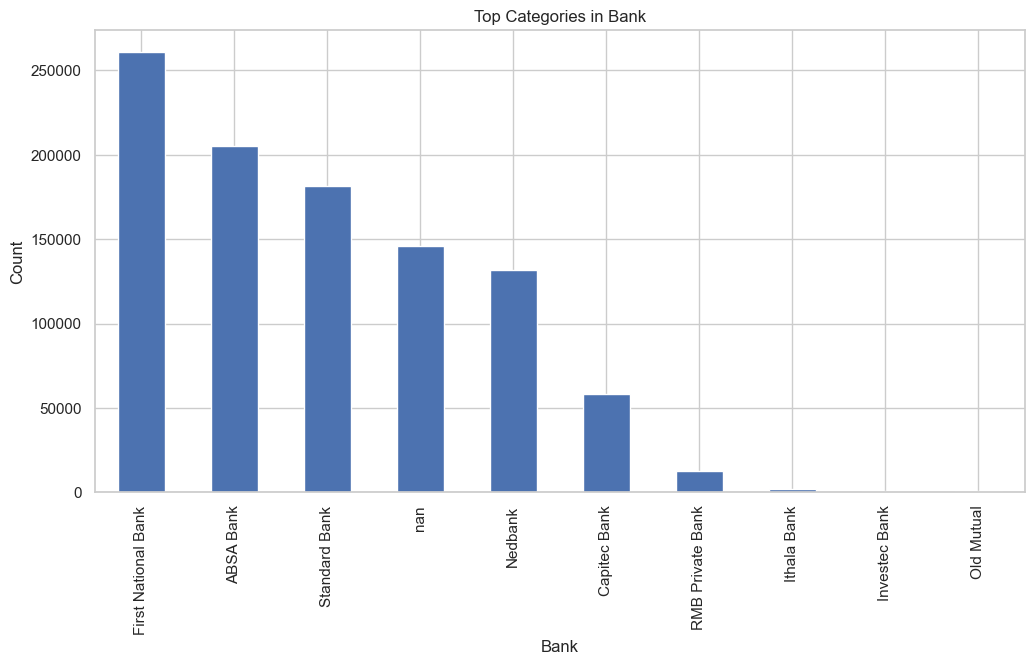

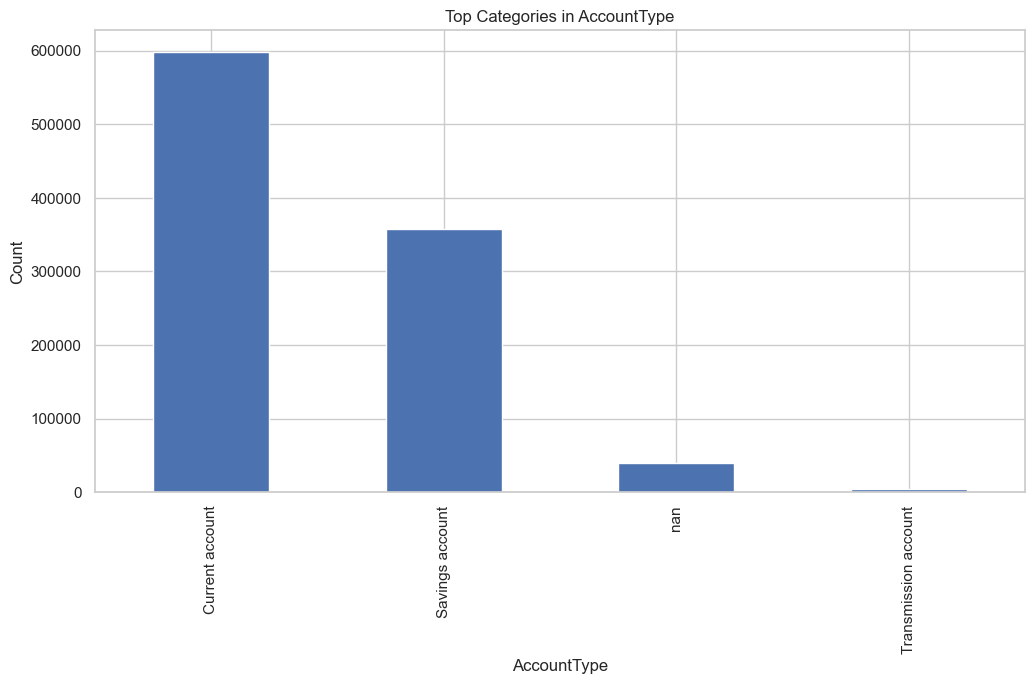

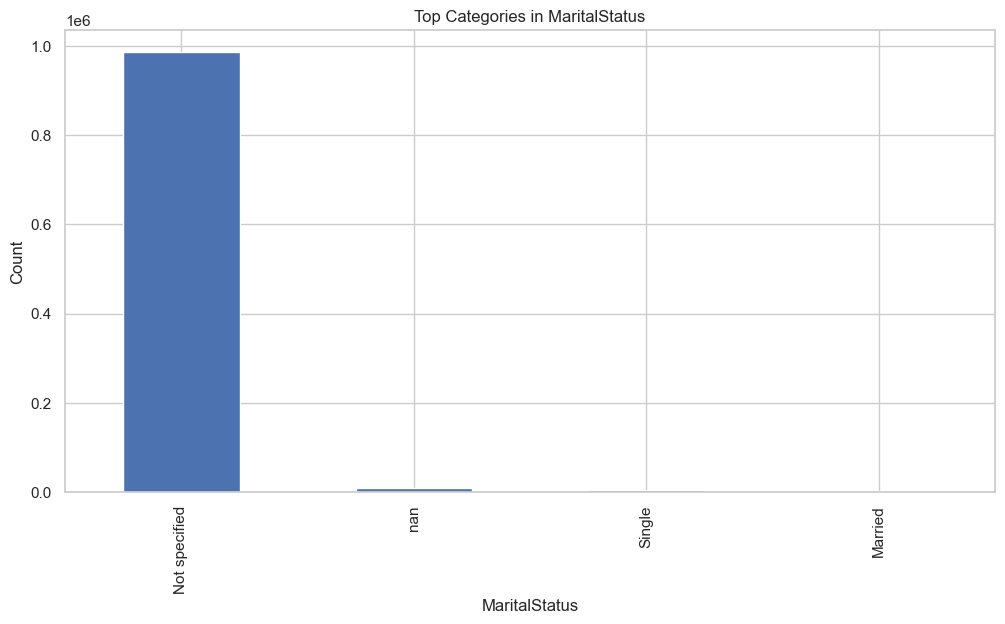

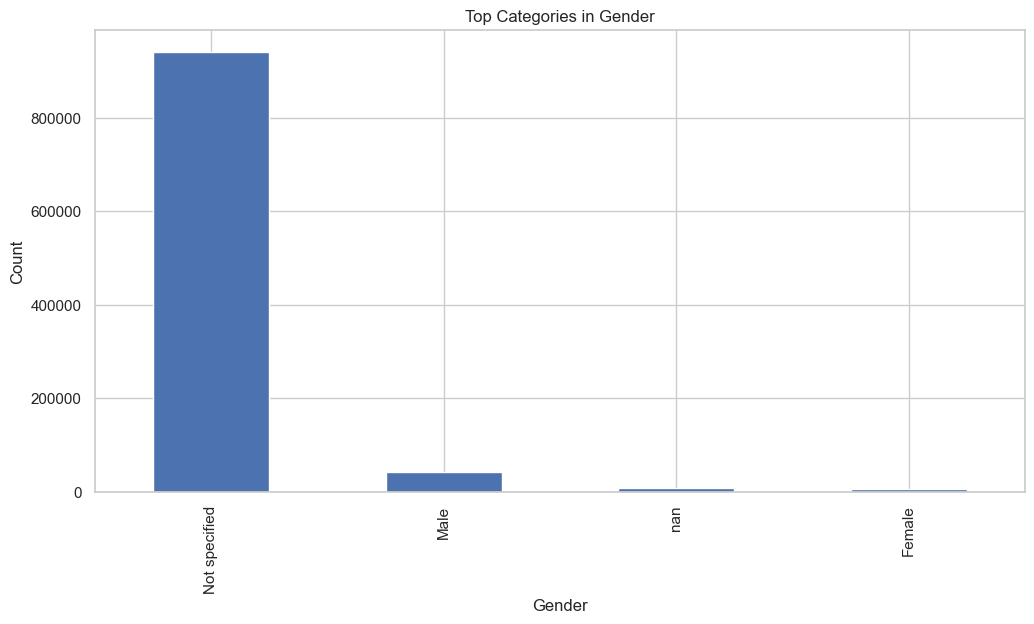

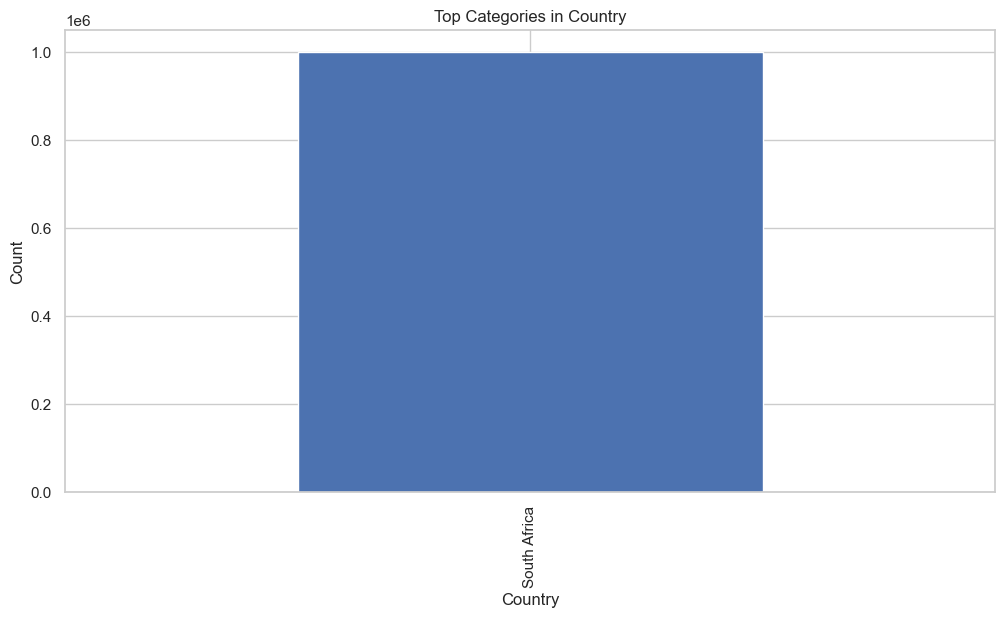

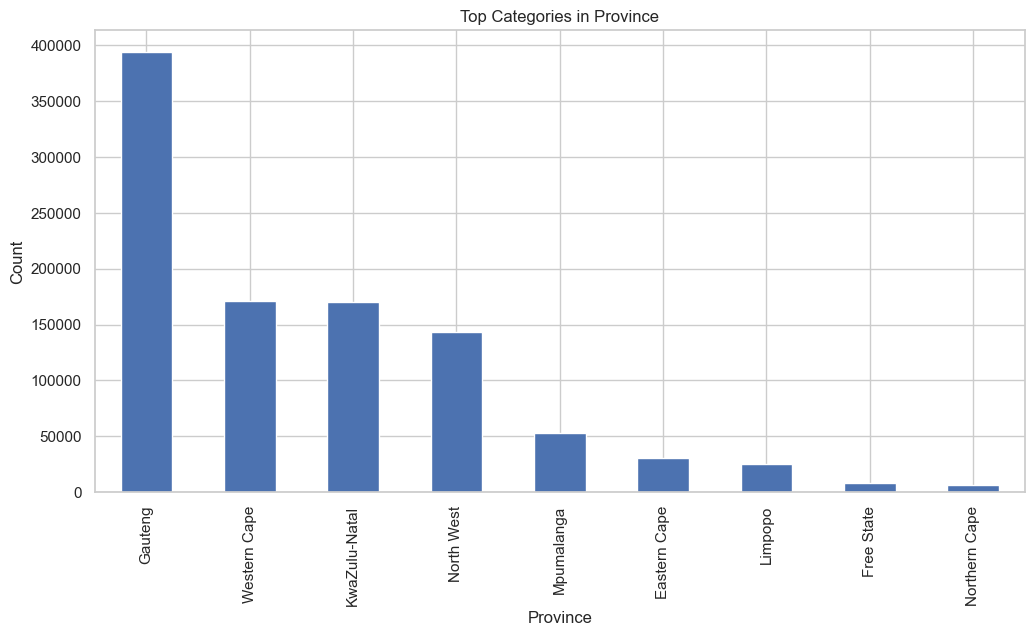

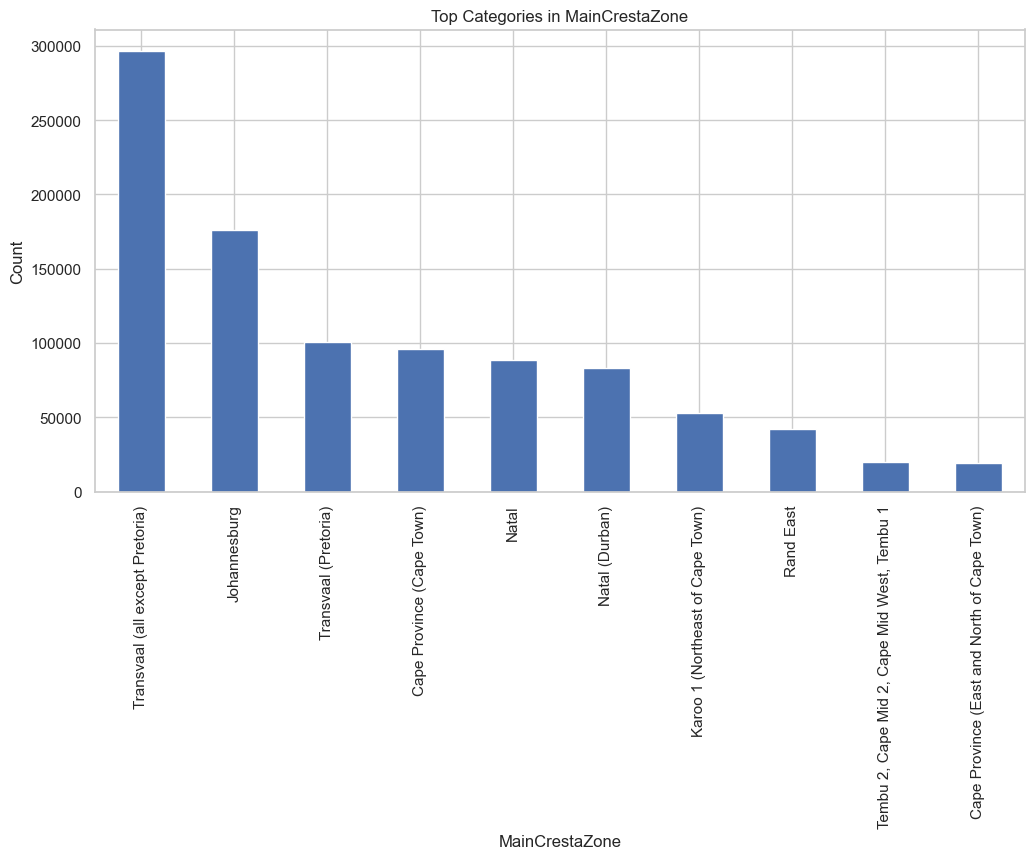

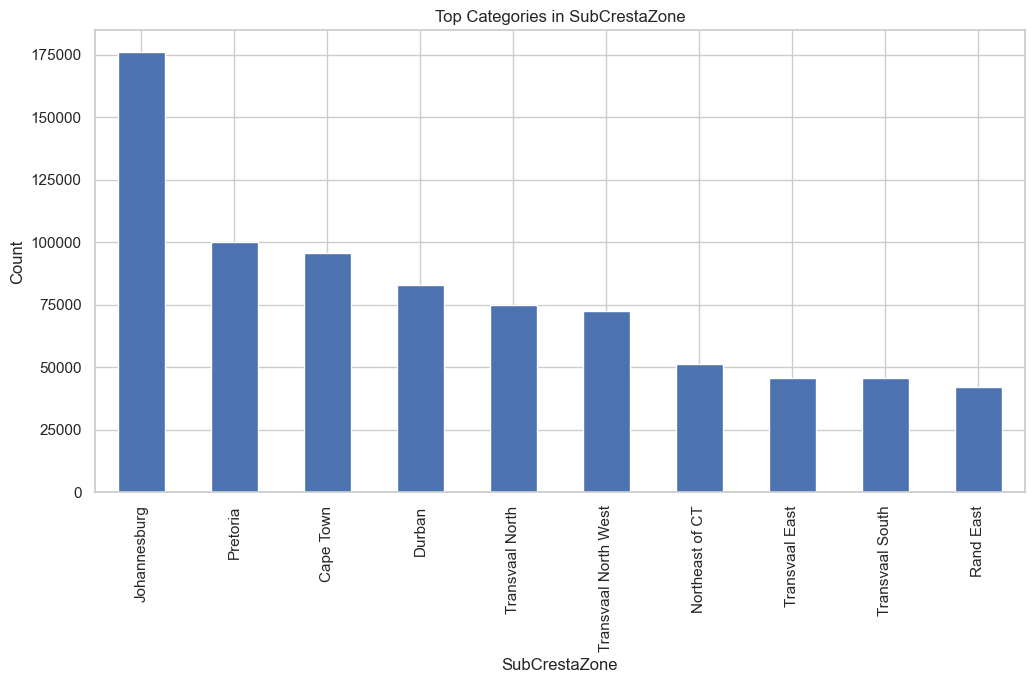

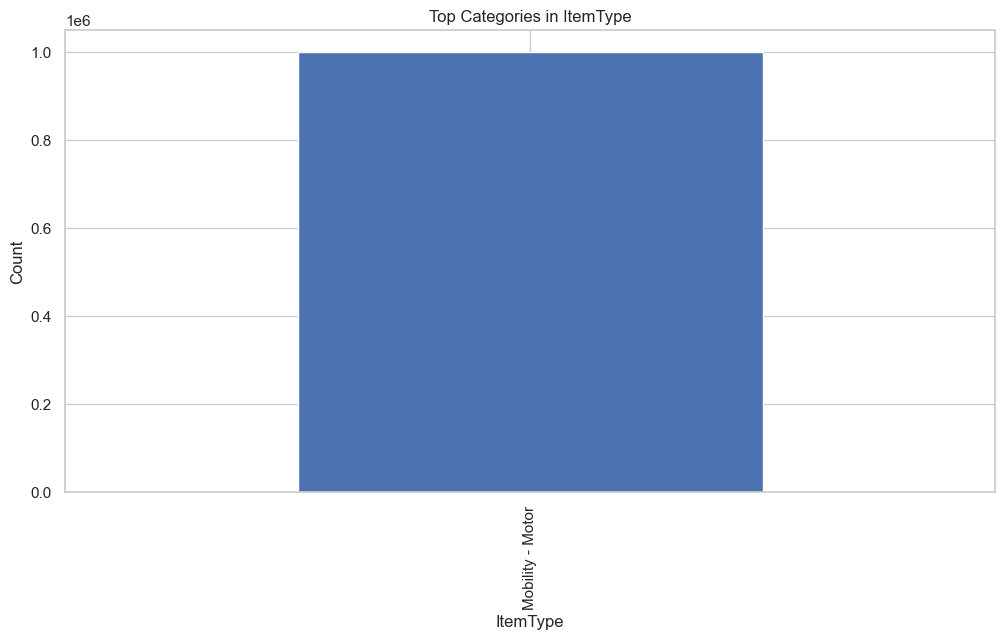

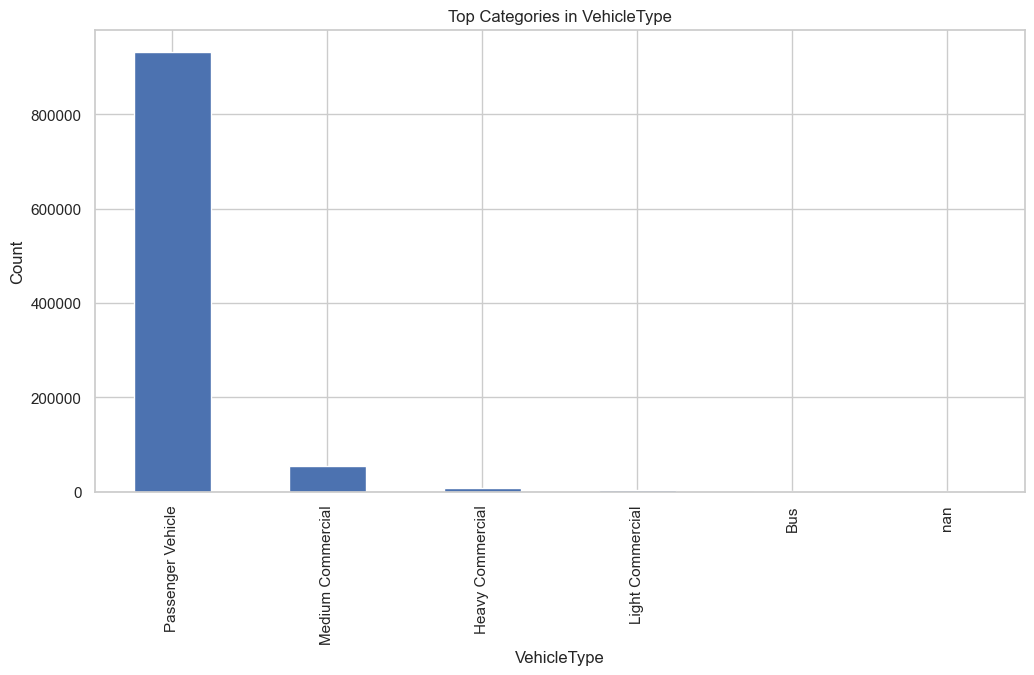

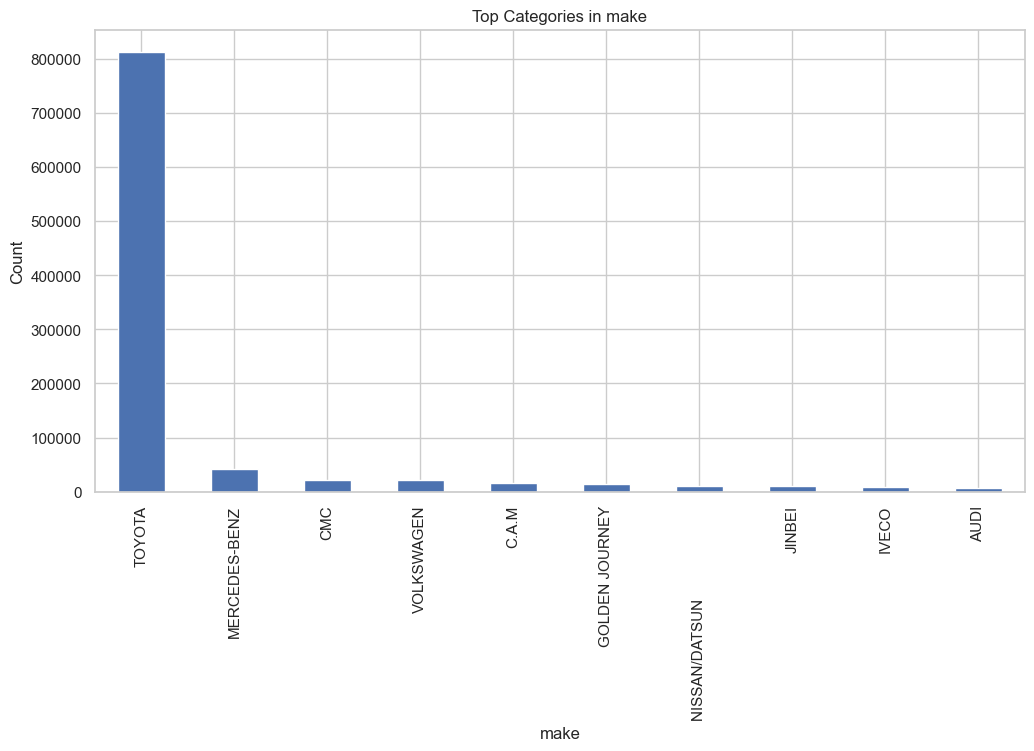

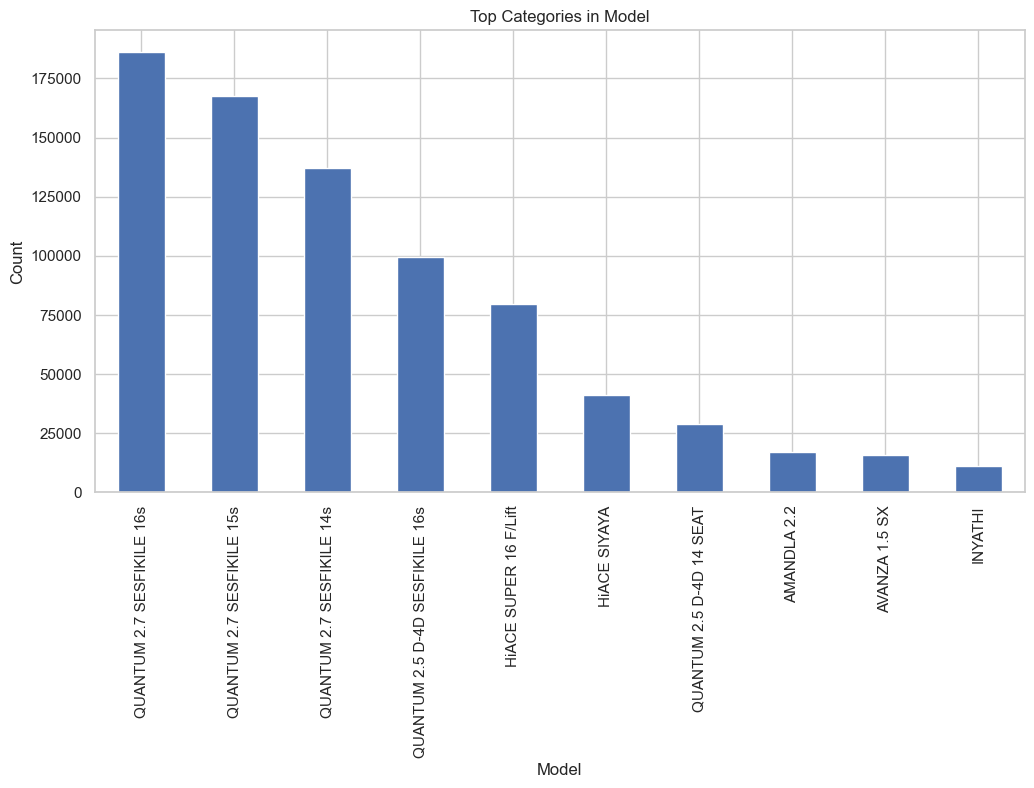

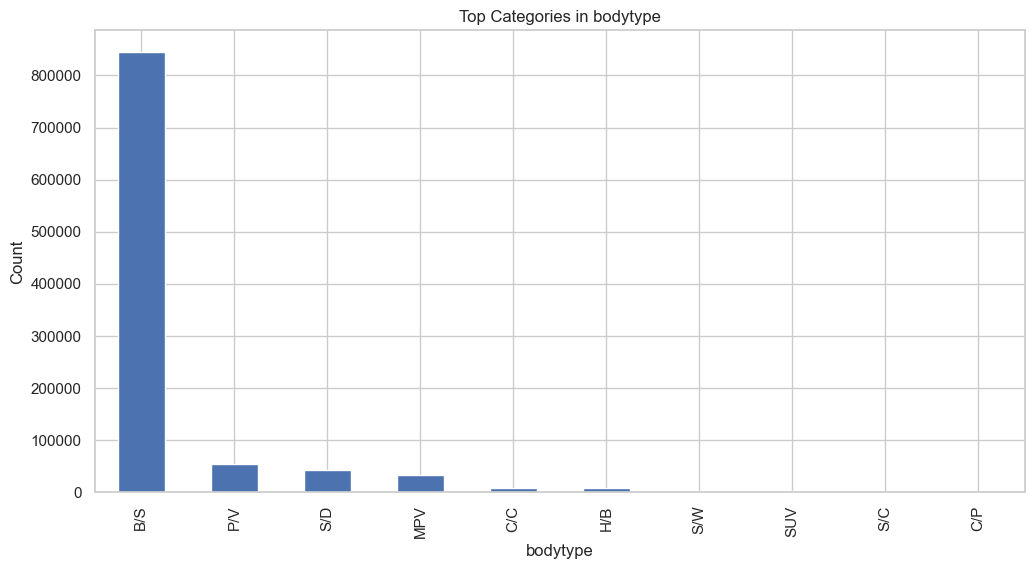

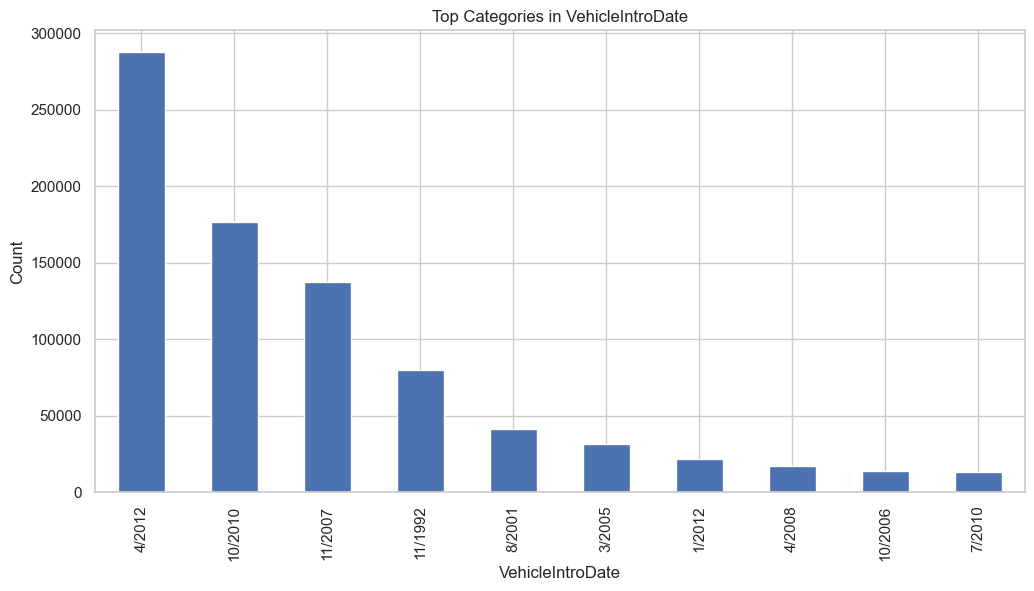

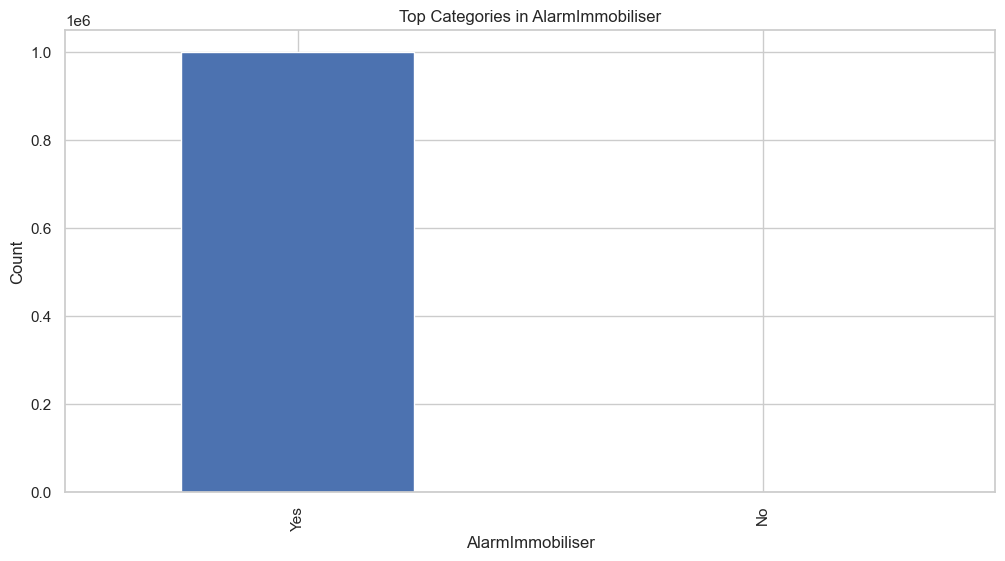

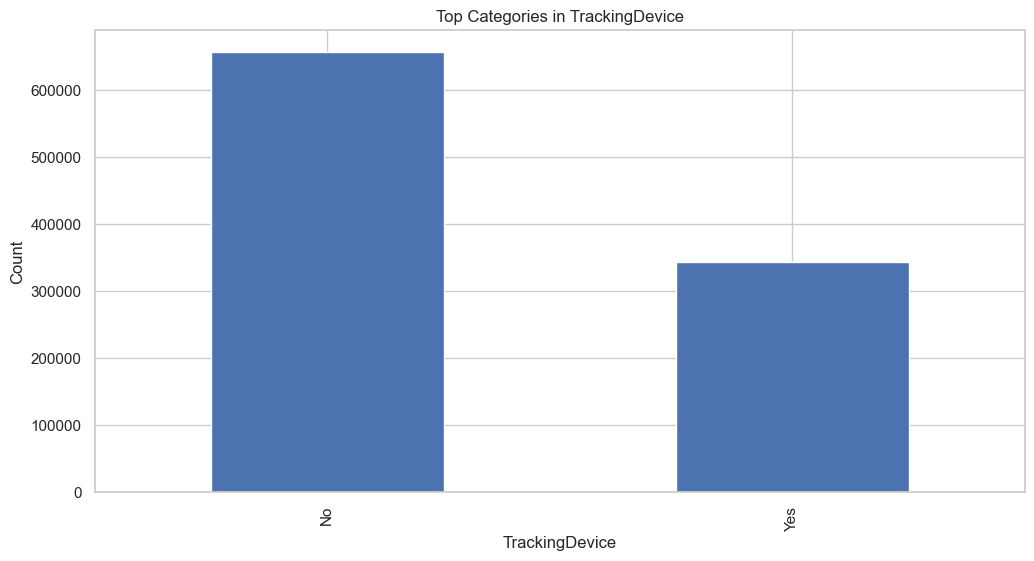

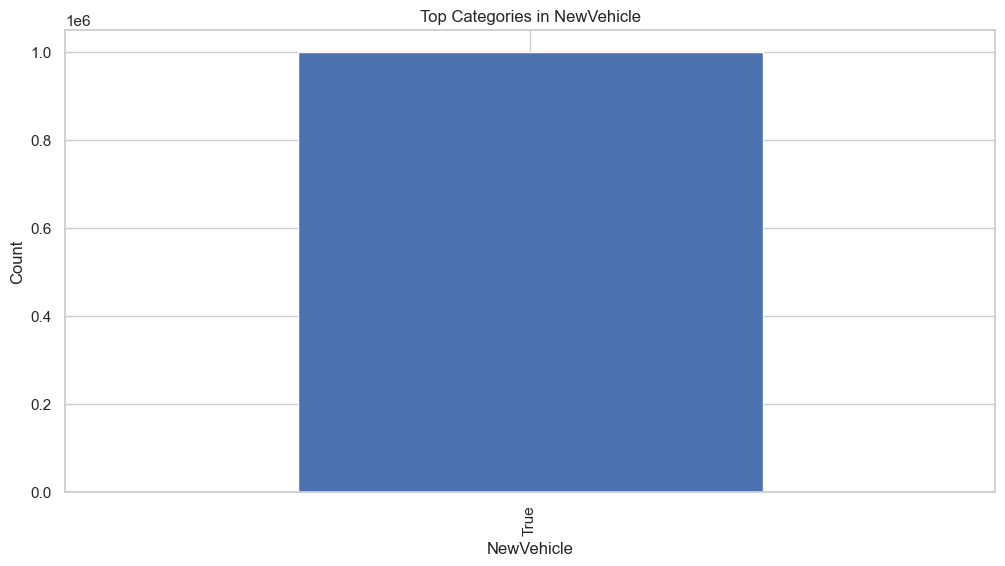

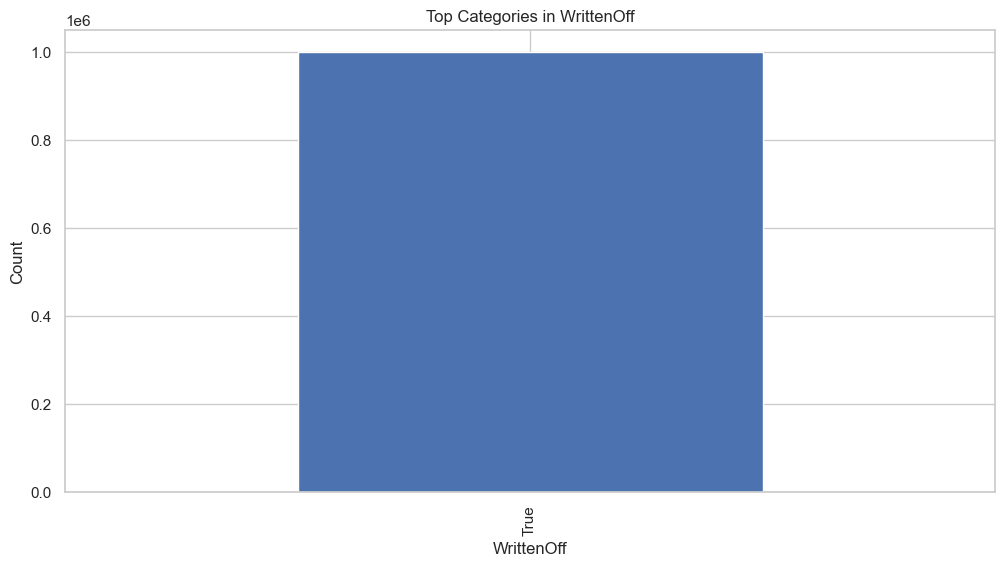

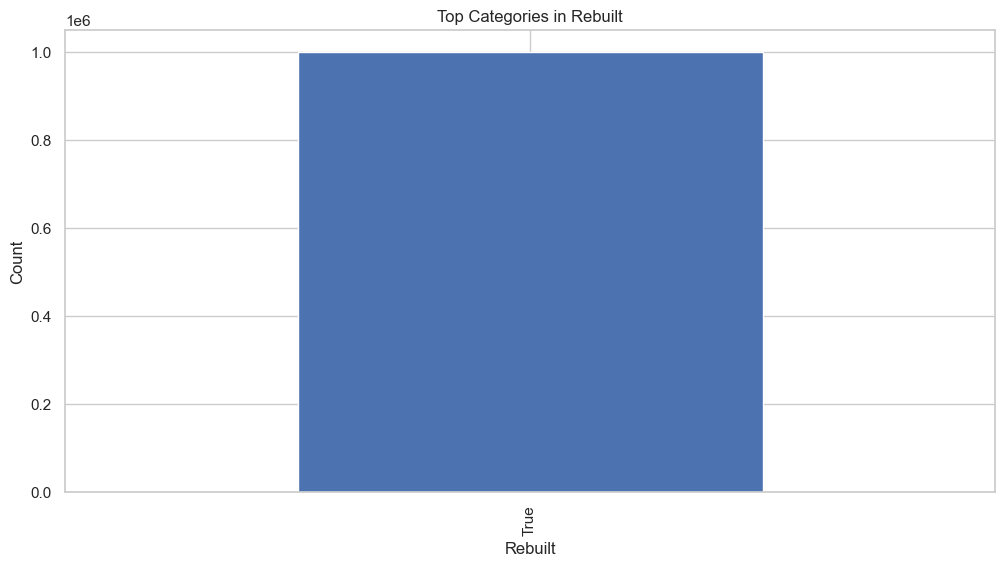

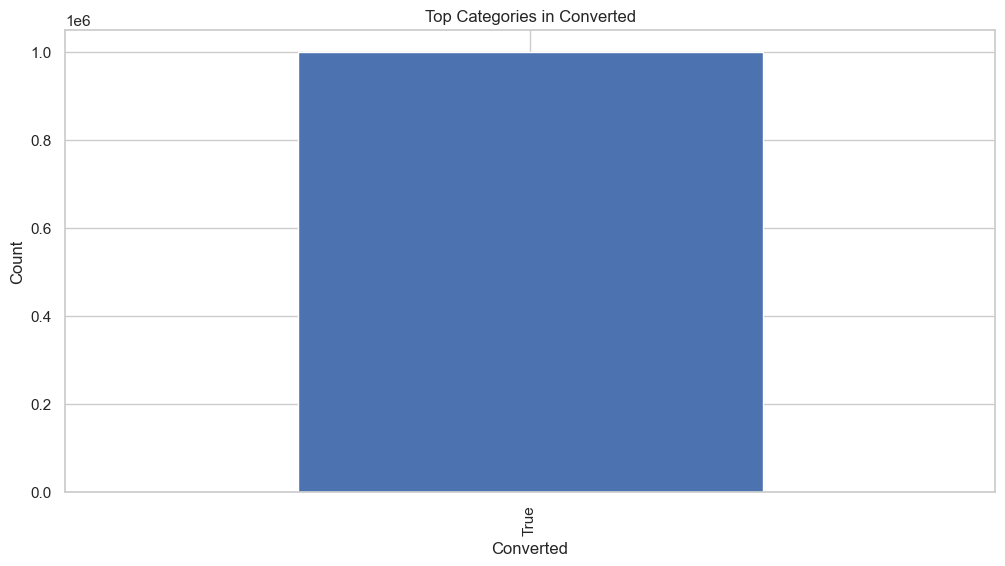

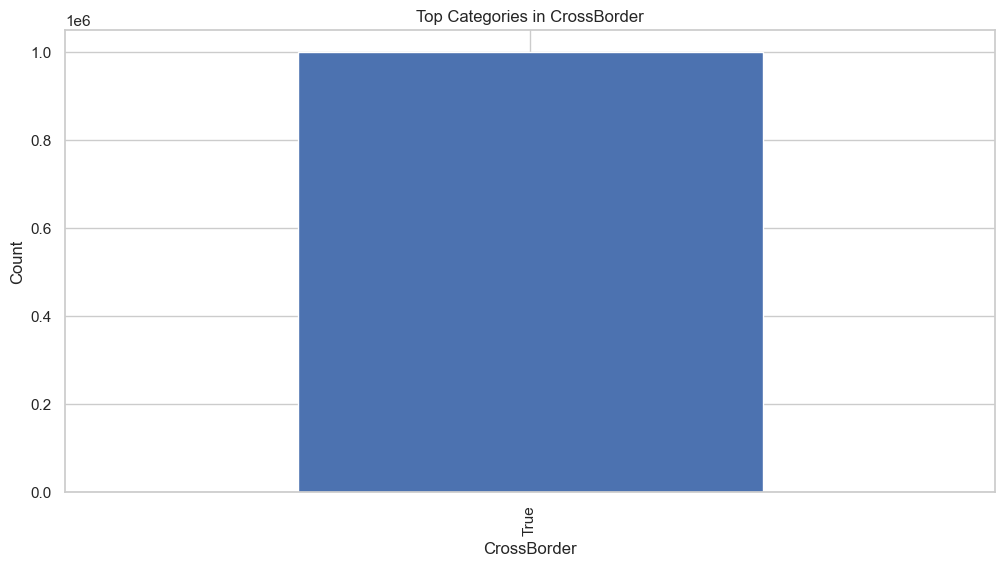

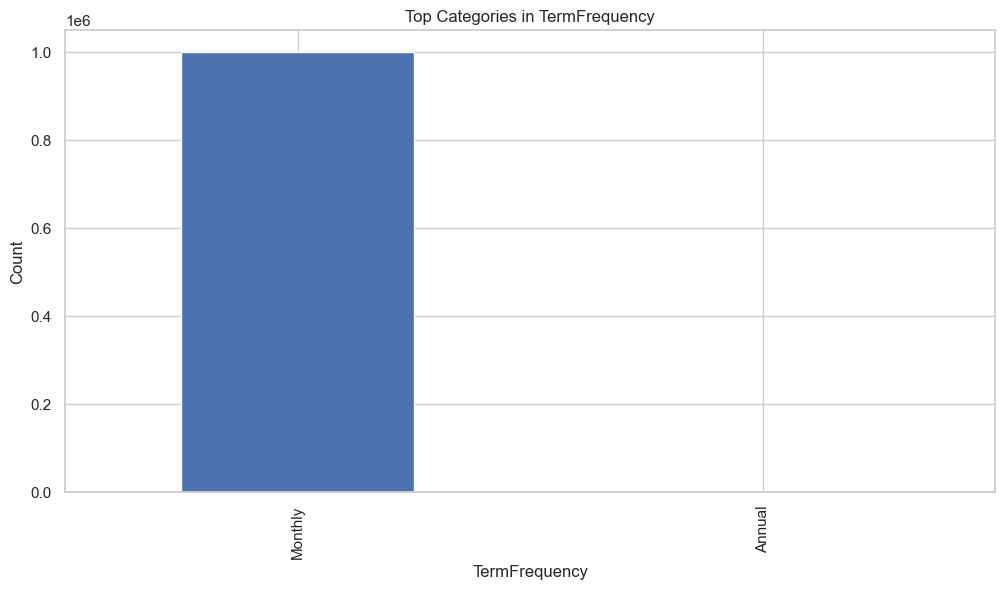

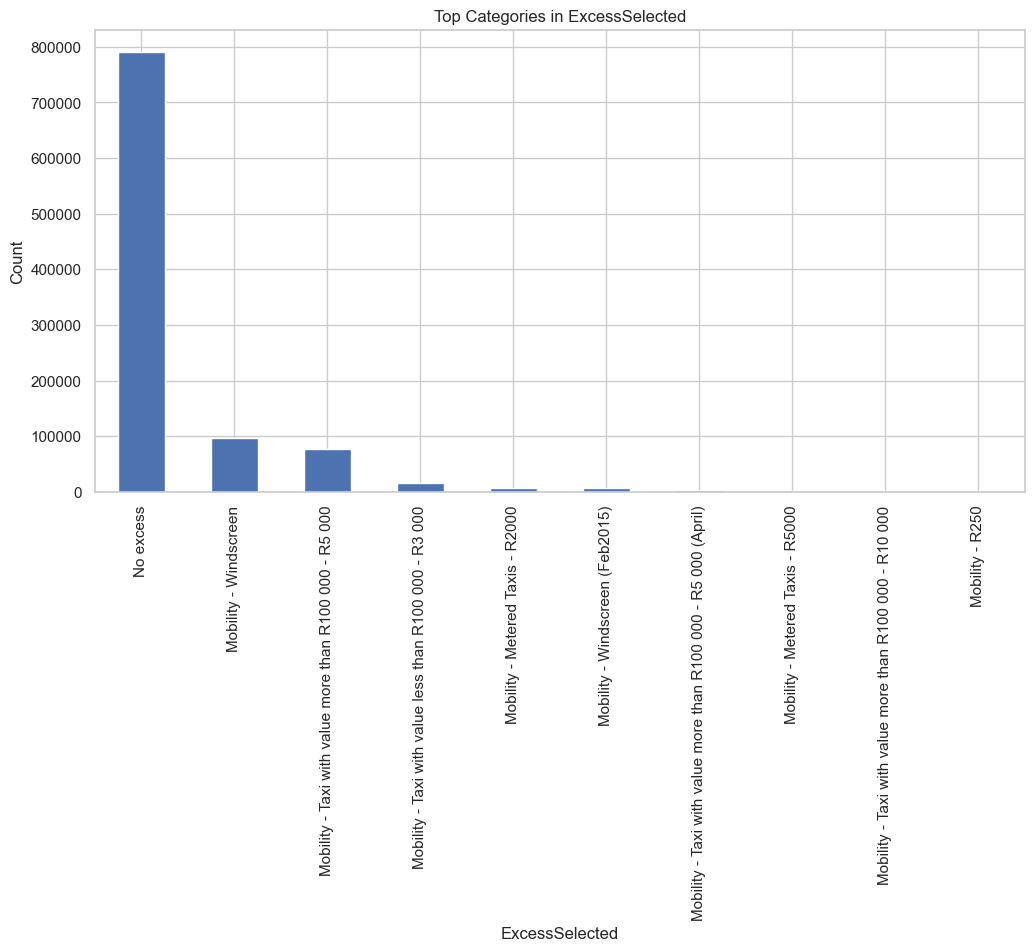

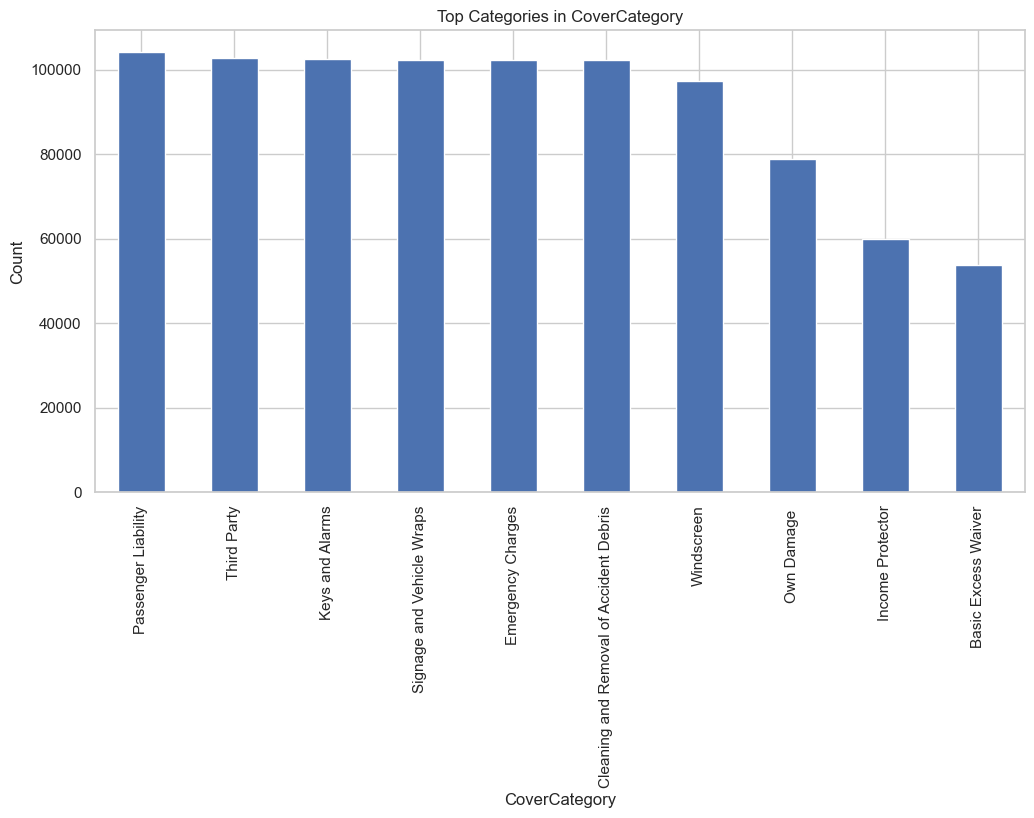

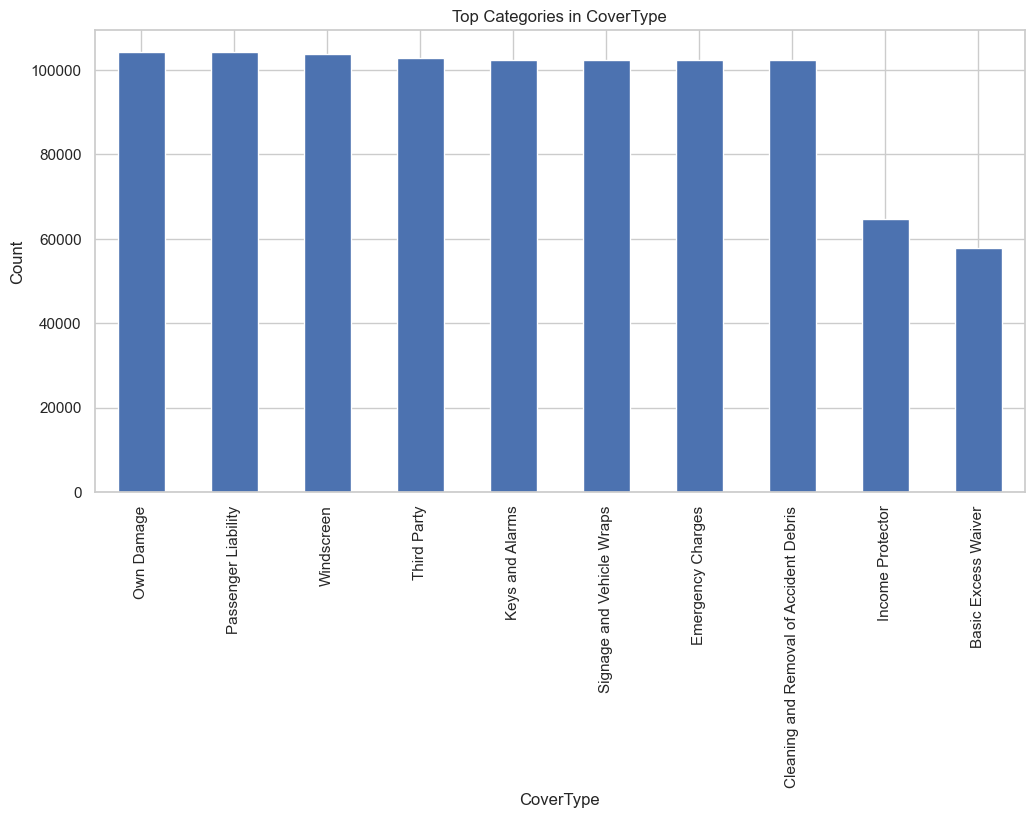

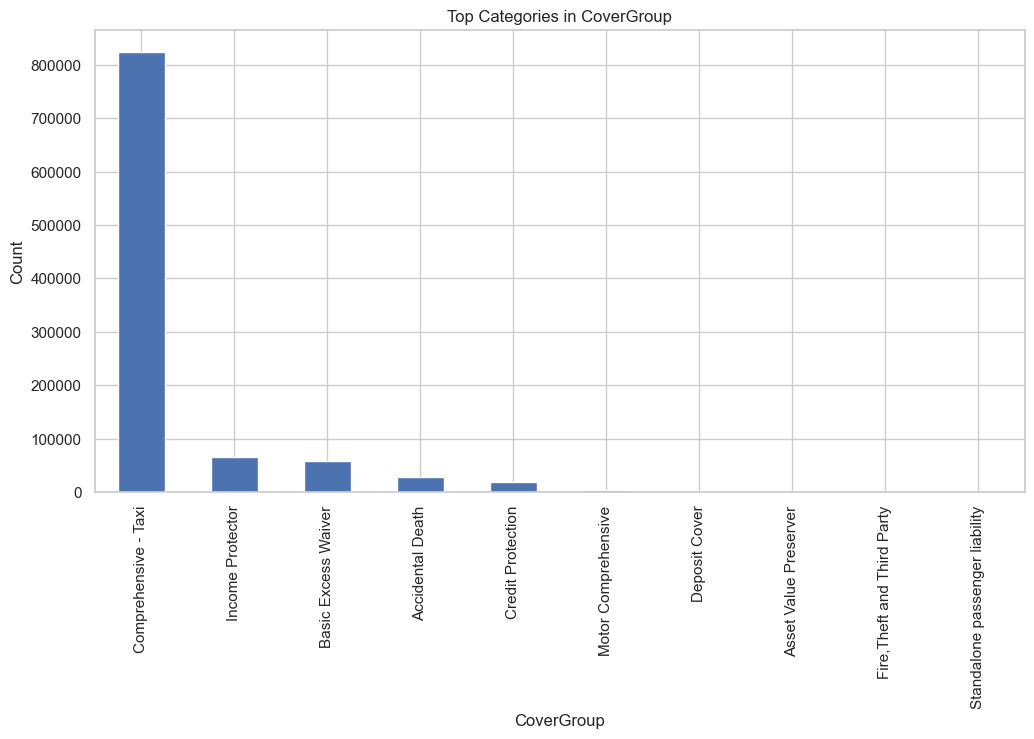

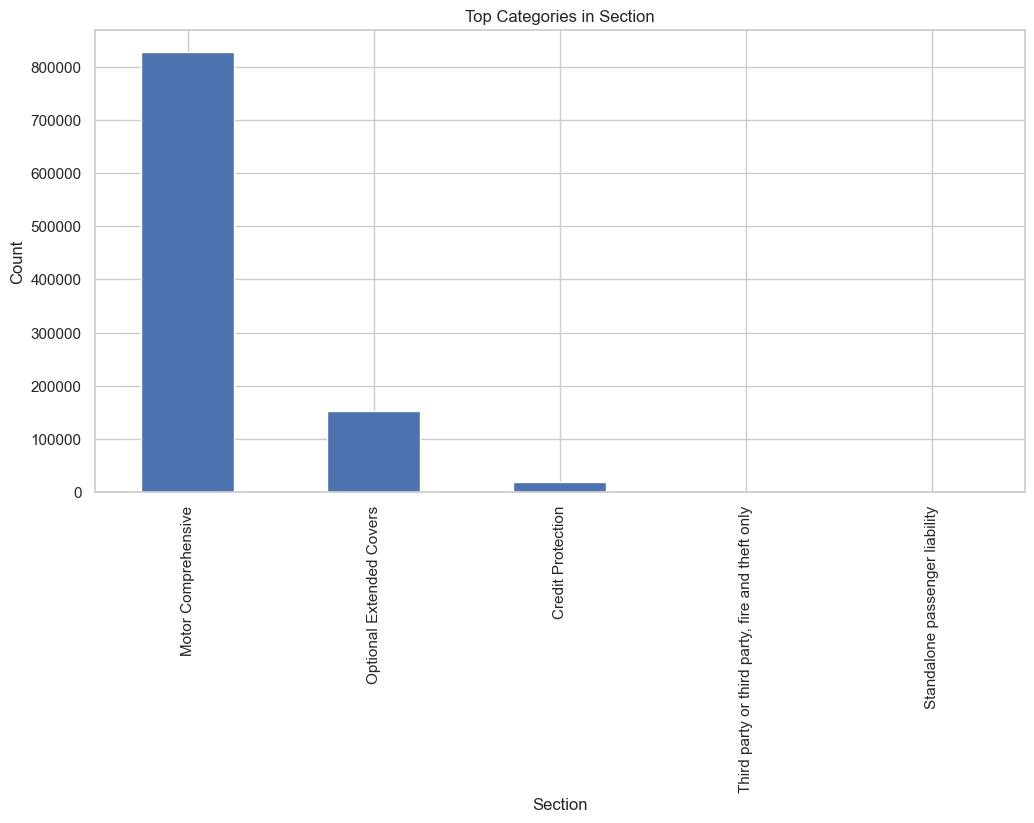

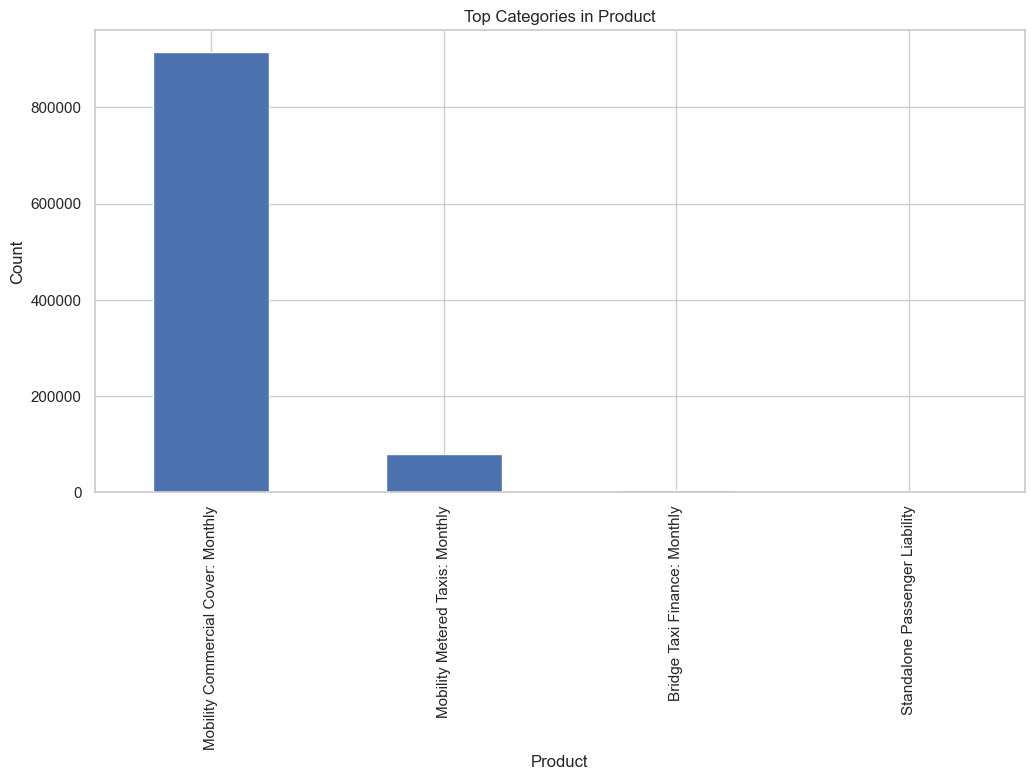

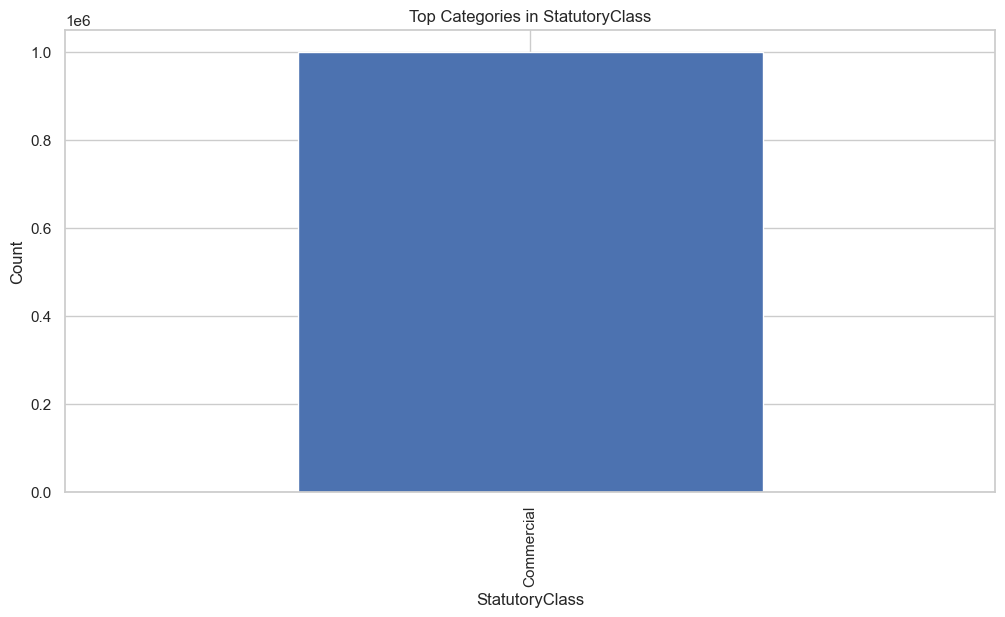

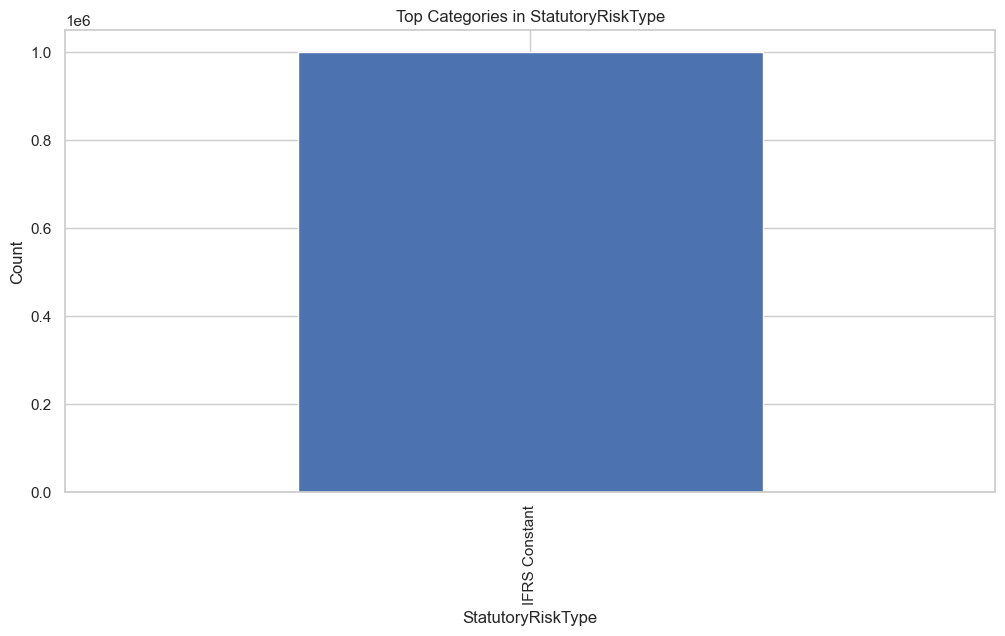

In [ ]:
plt.figure(figsize=(12, 6))

for col in categorical_cols:
    plt.figure(figsize=(12,6))
    df[col].value_counts(dropna=False).head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
# Ensure numeric fields are numeric
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

# Convert date column if available
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

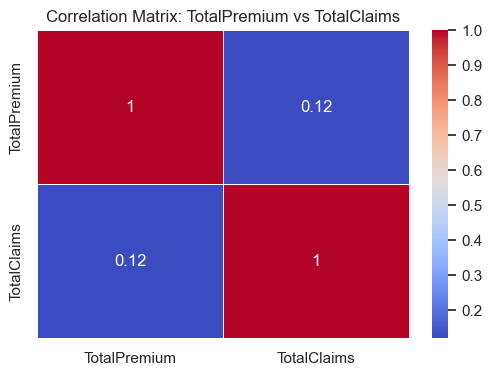

In [ ]:
numeric_cols = ['TotalPremium', 'TotalClaims']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: TotalPremium vs TotalClaims")
plt.show()


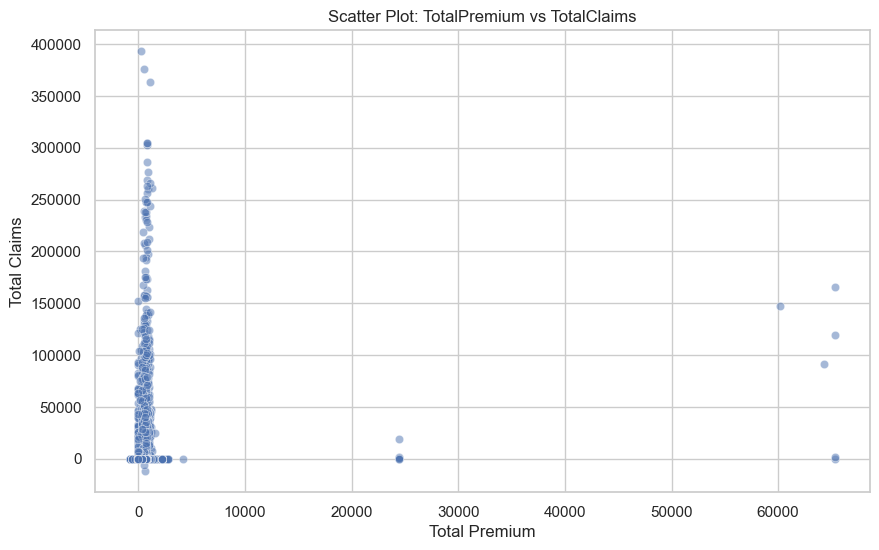

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', alpha=0.5)
plt.title("Scatter Plot: TotalPremium vs TotalClaims")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.show()


In [ ]:
zip_summary = df.groupby('PostalCode')[['TotalPremium','TotalClaims']].mean().reset_index()
zip_summary.head(10)


,PostalCode,TotalPremium,TotalClaims
0,1,51.120547,57.589092
1,2,40.901526,41.589582
2,4,113.948701,0.000000
3,5,61.652900,207.378816
4,6,50.591750,19.610447
5,7,33.587022,0.000000
6,8,90.447826,0.823011
7,17,107.650500,0.000000
8,21,98.540169,177.017206
9,22,55.390182,0.000000


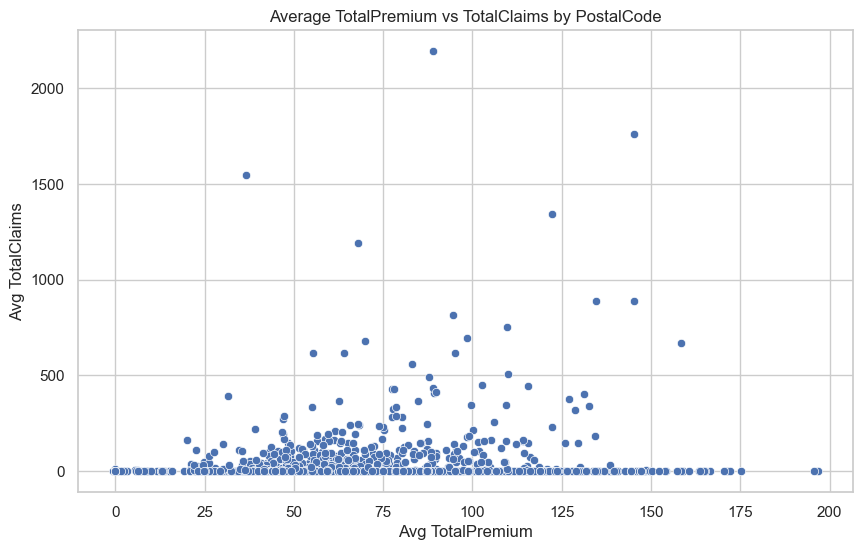

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=zip_summary, x='TotalPremium', y='TotalClaims')
plt.title("Average TotalPremium vs TotalClaims by PostalCode")
plt.xlabel("Avg TotalPremium")
plt.ylabel("Avg TotalClaims")
plt.show()


In [ ]:
zip_correlations = (
    df.groupby('PostalCode')[['TotalPremium','TotalClaims']]
      .corr()
      .unstack()
      .iloc[:,1]   # Extract correlation coefficient between the two variables
      .dropna()
)

zip_correlations = zip_correlations.reset_index()
zip_correlations.columns = ['PostalCode', 'Correlation']

zip_correlations.sort_values("Correlation", ascending=False).head()


,PostalCode,Correlation
71,466,0.625209
122,1342,0.593545
239,2920,0.567852
392,8000,0.427208
206,2063,0.405973


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(zip_correlations['Correlation'], kde=True)
plt.title("Distribution of Premium–Claims Correlation Across ZipCodes")
plt.xlabel("Correlation Coefficient")
plt.show()


NameError: name 'plt' is not defined

In [69]:
# Ensure numeric fields
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')

In [ ]:
province_stats = (
    df.groupby("Province")[["TotalPremium", "TotalClaims"]]
    .mean()
    .sort_values("TotalPremium", ascending=False)
)

province_stats


,TotalPremium,TotalClaims
Province,,
KwaZulu-Natal,77.800683,84.234293
Eastern Cape,70.546672,44.713432
Free State,64.373860,43.822975
Limpopo,61.899154,40.927553
Gauteng,61.071070,74.630009
Western Cape,57.416828,60.831482
Mpumalanga,53.801230,38.785147
North West,52.276275,41.317426
Northern Cape,49.617254,14.026726


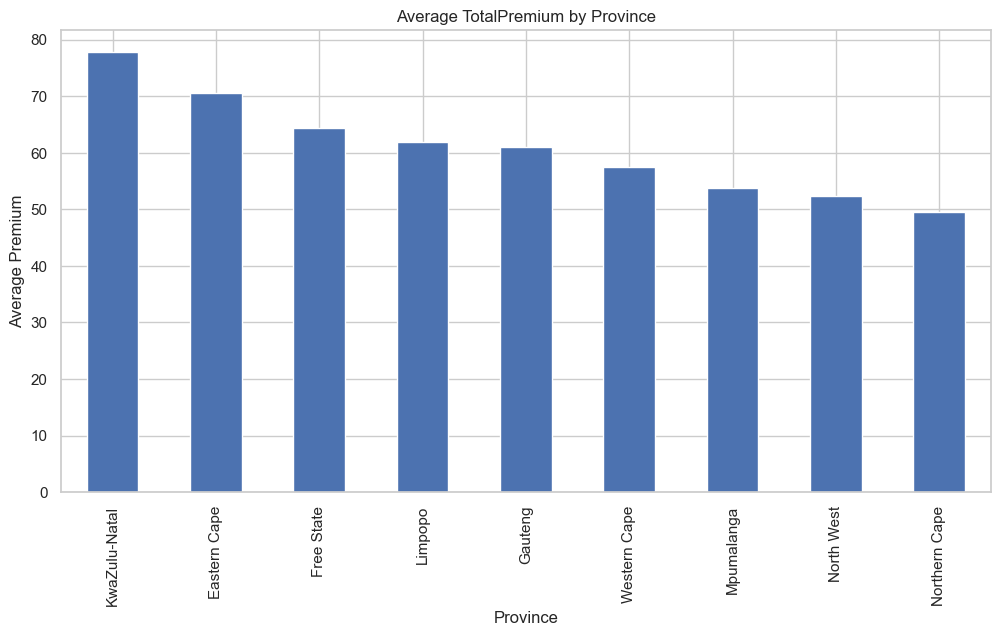

In [ ]:
plt.figure(figsize=(12,6))
province_stats["TotalPremium"].plot(kind="bar")
plt.title("Average TotalPremium by Province")
plt.xlabel("Province")
plt.ylabel("Average Premium")
plt.show()


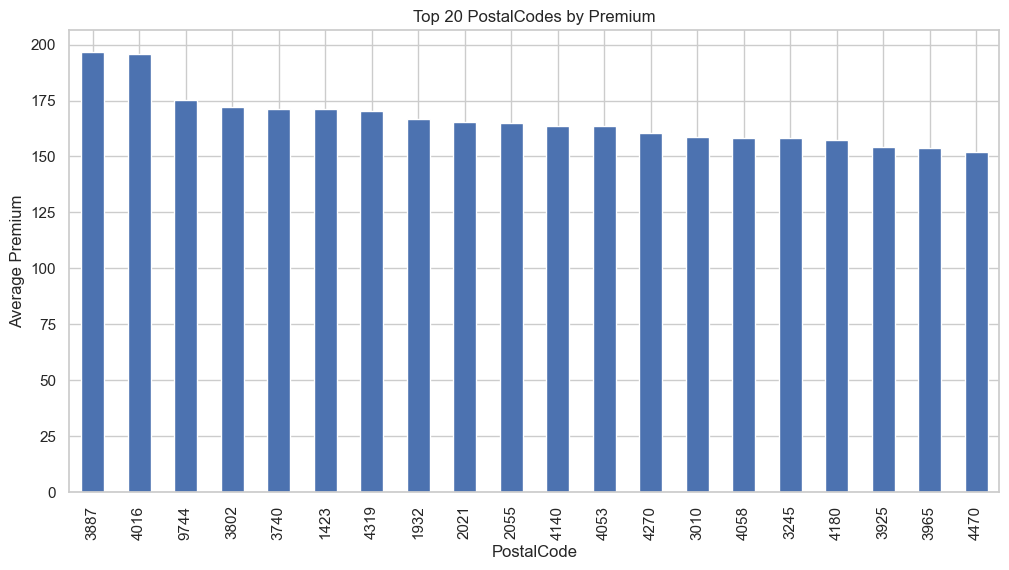

In [ ]:
top_zip = (
    df.groupby("PostalCode")["TotalPremium"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(12,6))
top_zip.plot(kind="bar")
plt.title("Top 20 PostalCodes by Premium")
plt.xlabel("PostalCode")
plt.ylabel("Average Premium")
plt.show()


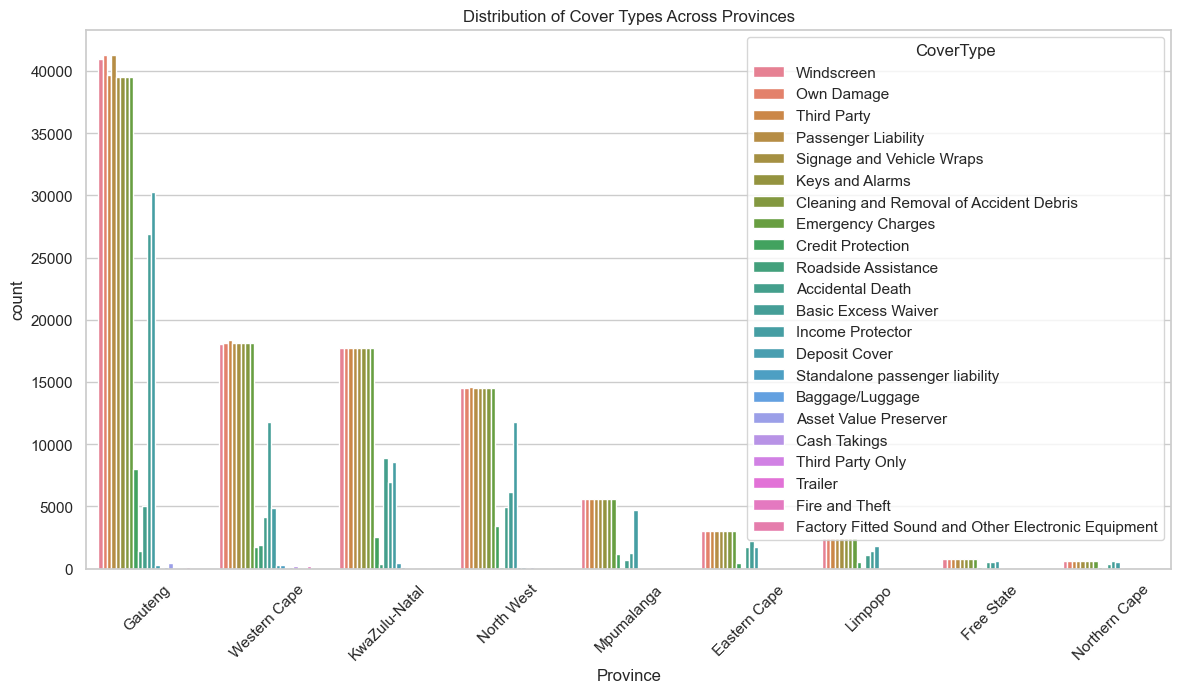

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x="Province", hue="CoverType",
              order=df["Province"].value_counts().index)
plt.title("Distribution of Cover Types Across Provinces")
plt.xticks(rotation=45)
plt.legend(title="CoverType")
plt.show()


In [ ]:
top_makes = df["make"].value_counts().head(15).index
filtered_df = df[df["make"].isin(top_makes)]

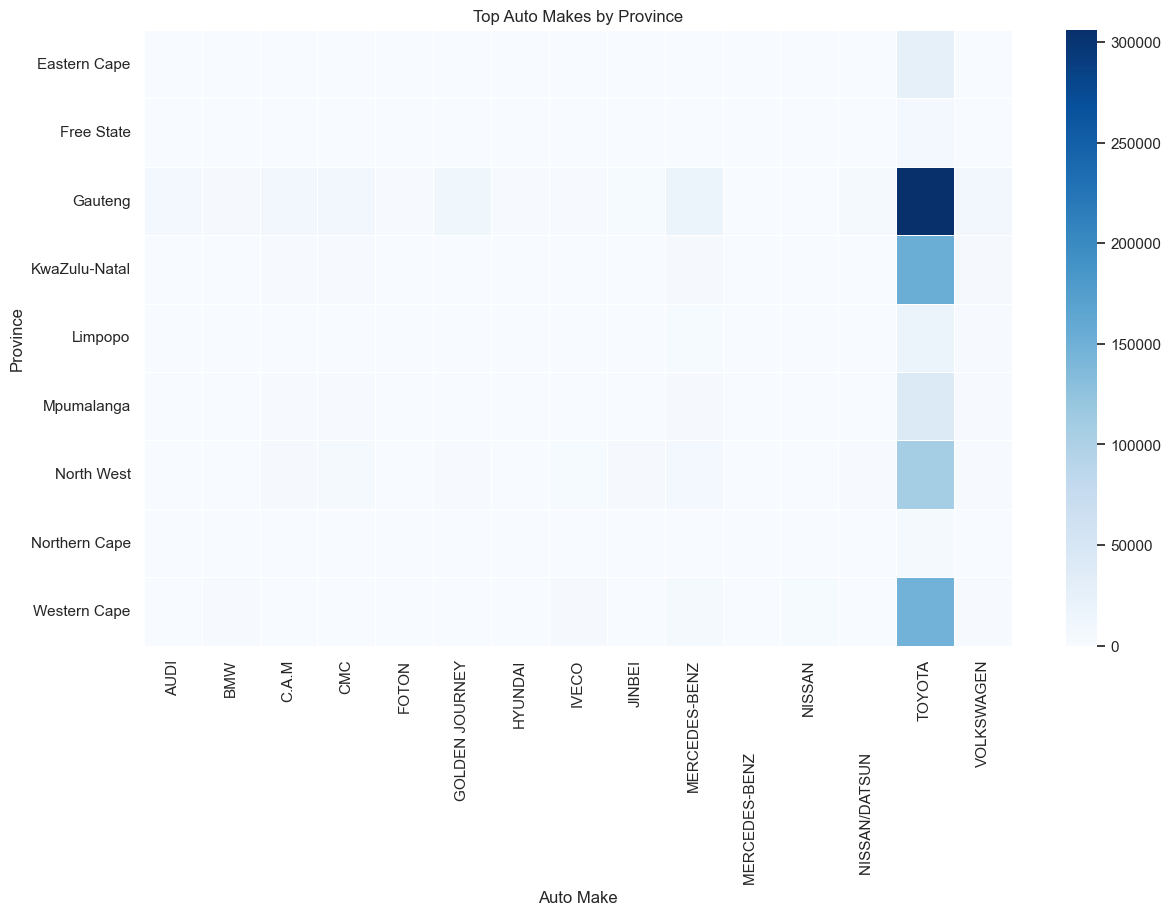

In [ ]:
make_geo = pd.crosstab(filtered_df["Province"], filtered_df["make"])

plt.figure(figsize=(14,8))
sns.heatmap(make_geo, cmap="Blues", linewidths=0.5)
plt.title("Top Auto Makes by Province")
plt.xlabel("Auto Make")
plt.ylabel("Province")
plt.show()


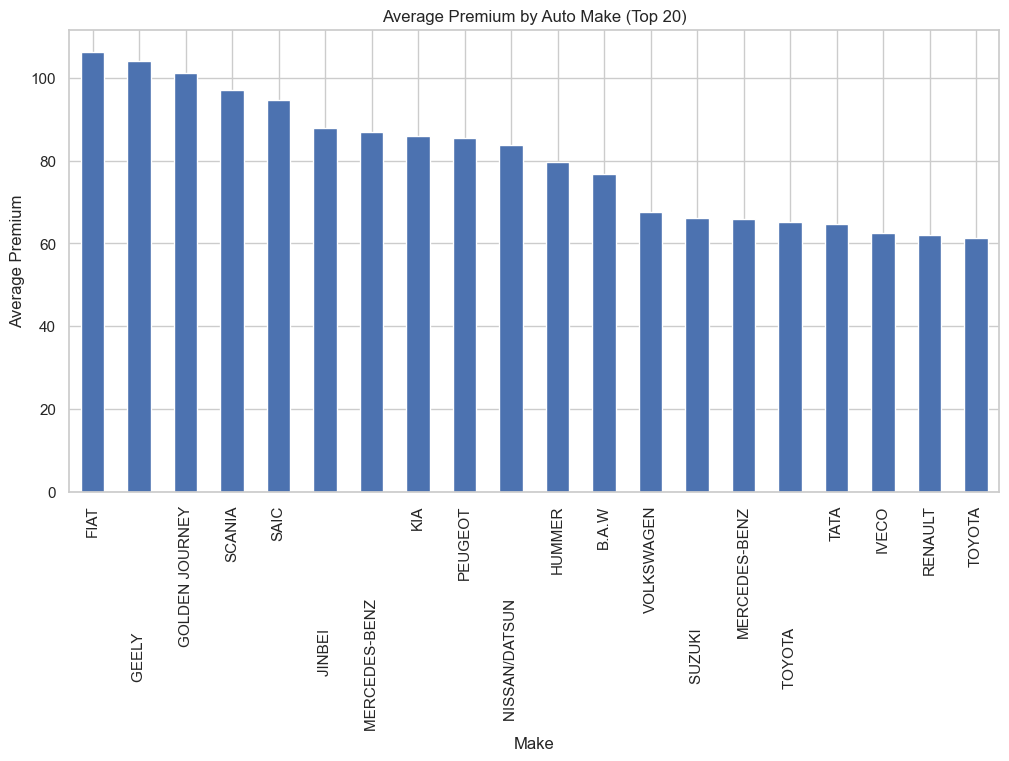

In [ ]:
make_premium = (
    df.groupby("make")["TotalPremium"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(12,6))
make_premium.plot(kind="bar")
plt.title("Average Premium by Auto Make (Top 20)")
plt.ylabel("Average Premium")
plt.xlabel("Make")
plt.show()


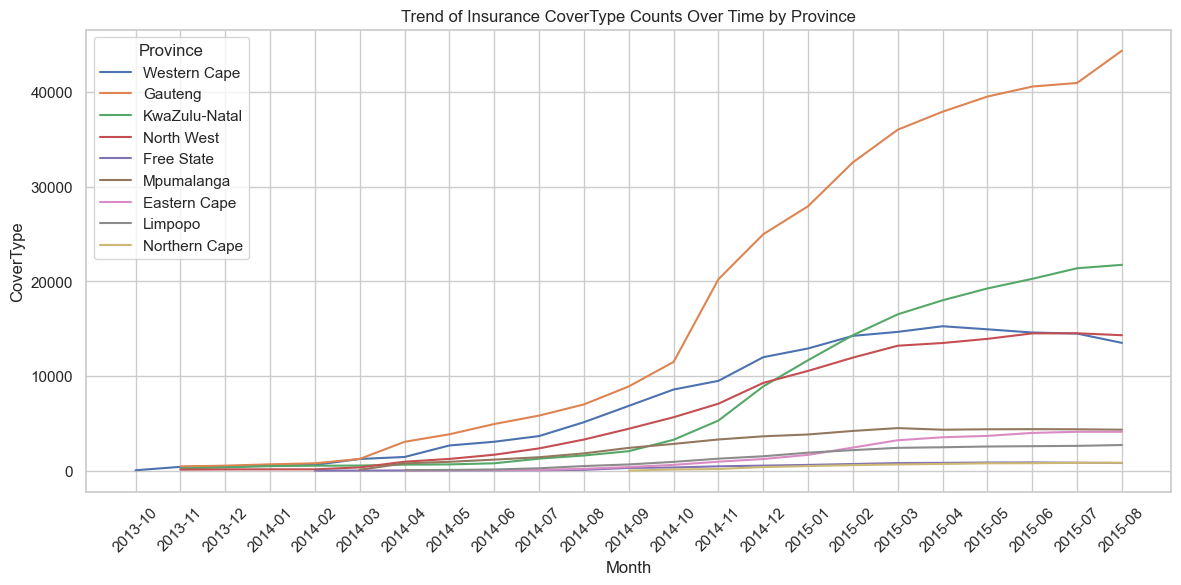

In [ ]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['Month'] = df['TransactionMonth'].dt.to_period('M').astype(str)

cover_time = df.groupby(["Month", "Province"])["CoverType"].count().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=cover_time, x="Month", y="CoverType", hue="Province")
plt.xticks(rotation=45)
plt.title("Trend of Insurance CoverType Counts Over Time by Province")
plt.show()


In [ ]:
df["ClaimFrequency"] = np.where(df["TotalClaims"] > 0, 1, 0)
df["ClaimSeverity"] = df["TotalClaims"].where(df["TotalClaims"] > 0, np.nan)
df["Margin"] = df["TotalPremium"] - df["TotalClaims"]

df[["ClaimFrequency", "ClaimSeverity", "Margin"]].describe()


,ClaimFrequency,ClaimSeverity,Margin
count,1.000098e+06,2788.000000,1.000098e+06
mean,2.787727e-03,23273.387063,-2.955700e+00
std,5.272531e-02,38719.512597,2.367137e+03
min,0.000000e+00,139.043860,-3.928486e+05
25%,0.000000e+00,1680.728070,0.000000e+00
50%,0.000000e+00,6140.350877,2.160000e+00
75%,0.000000e+00,30480.991228,2.193000e+01
max,1.000000e+00,393092.105263,6.528260e+04


In [ ]:
from scipy import stats
def run_ttest(group1, group2, metric):
    """Two-sample t-test for continuous metrics like Margin, ClaimSeverity."""
    g1 = group1[metric].dropna()
    g2 = group2[metric].dropna()
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=False)
    return p_val

def run_proportion_test(group1, group2, metric):
    """Z-test for proportions (ClaimFrequency)."""
    p1 = group1[metric].mean()
    p2 = group2[metric].mean()
    n1 = len(group1)
    n2 = len(group2)

    # pooled proportion
    p = (group1[metric].sum() + group2[metric].sum()) / (n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1 + 1/n2))
    
    z = (p1 - p2) / se
    p_val = 2 * (1 - stats.norm.cdf(abs(z)))
    return p_val


## Hypothesis 1
H₀: There are no risk differences across provinces

## ANOVA: Severity Across Provinces

In [ ]:
groups = [g["ClaimSeverity"].dropna() for _, g in df.groupby("Province")]

f_stat, p_val_anova = stats.f_oneway(*groups)
p_val_anova

np.float64(6.304916760425176e-06)

### Conclusion

There is a highly significant difference in mean ClaimSeverity between at least one pair of Provinces.

This means:

✔️ The Province variable does influence ClaimSeverity
✔️ Not all provinces have the same average ClaimSeverity
✔️ The differences are statistically meaningful, not random chance

## Chi-square test: Frequency Across Provinces

In [ ]:
cont_table = pd.crosstab(df["Province"], df["ClaimFrequency"])
chi2, p_val_chi, dof, exp = stats.chi2_contingency(cont_table)
p_val_chi


np.float64(5.925510718204678e-19)

➤ Claim frequency varies by province
➤ Province and claim behavior are NOT independent
➤ The differences are real and statistically meaningful, not random

## Hypothesis 2
H₀: No risk differences between zip (postal) codes

### chi-square 

In [ ]:
cont_table = pd.crosstab(df["Province"], df["ClaimFrequency"])
chi2, p_val_chi, dof, exp = stats.chi2_contingency(cont_table)
p_val_chi


np.float64(5.925510718204678e-19)

✔️ There IS a statistically significant relationship/difference
✔️ The result is NOT due to random chance
✔️ You must reject the null hypothesis


## Hypothesis 3

In [ ]:
groups_margin = [g["Margin"].dropna() for _, g in df.groupby("PostalCode")]

f_stat_margin, p_val_margin = stats.f_oneway(*groups_margin)
p_val_margin


np.float64(0.9976859700945978)

### Fail to reject the hypothesis 
There is no significant margin (profit) difference between zip codes 

## Hypothesis 4
H₀: No risk difference between Women and Men

In [ ]:
men = df[df["Gender"] == "Male"]
women = df[df["Gender"] == "Female"]

p_freq_gender = run_proportion_test(men, women, "ClaimFrequency")
p_sev_gender = run_ttest(men, women, "ClaimSeverity")
p_margin_gender = run_ttest(men, women, "Margin")

p_freq_gender, p_sev_gender, p_margin_gender


(np.float64(0.8404941485359676),
 np.float64(0.5680286951630678),
 np.float64(0.8015537321436077))

In this dataset, gender does not significantly affect claim frequency, claim severity, or margin.
Men and women behave similarly in terms of claims and profitability.

In [ ]:
def interpret(name, p_val):
    if p_val < 0.05:
        return f"Reject H0 for {name} (p={p_val:.4f}) → Significant difference"
    else:
        return f"Fail to reject H0 for {name} (p={p_val:.4f}) → No significant difference"

print("Province – Severity:", interpret("Province Severity", p_val_anova))
print("Province – Frequency:", interpret("Province Frequency", p_val_chi))

print("Postal – Severity:", interpret("Postal Severity", p_val_zip_sev))
print("Postal – Frequency:", interpret("Postal Frequency", p_val_zip_freq))
print("Postal – Margin:", interpret("Margin by Postal Code", p_val_margin))

print("Gender – Claim Frequency:", interpret("Gender Frequency", p_freq_gender))
print("Gender – Claim Severity:", interpret("Gender Severity", p_sev_gender))
print("Gender – Margin:", interpret("Gender Margin", p_margin_gender))


Province – Severity: Reject H0 for Province Severity (p=0.0000) → Significant difference
Province – Frequency: Reject H0 for Province Frequency (p=0.0000) → Significant difference
Postal – Severity: Fail to reject H0 for Postal Severity (p=nan) → No significant difference
Postal – Frequency: Reject H0 for Postal Frequency (p=0.0000) → Significant difference
Postal – Margin: Fail to reject H0 for Margin by Postal Code (p=0.9977) → No significant difference
Gender – Claim Frequency: Fail to reject H0 for Gender Frequency (p=0.8405) → No significant difference
Gender – Claim Severity: Fail to reject H0 for Gender Severity (p=0.5680) → No significant difference
Gender – Margin: Fail to reject H0 for Gender Margin (p=0.8016) → No significant difference


## Business Interpretation & Recommendations

### 1. Provincial Risk Differences
**If the null hypothesis is rejected:**  
Statistical testing indicates that provinces exhibit significant differences in claim frequency, claim severity, or both. This means geographic regions do not carry uniform underwriting risk.

**Recommendation:**  
Implement region-based rating adjustments.  
For example, if Gauteng demonstrates a materially higher loss ratio than the Western Cape, premium factors for Gauteng should be increased to correct for elevated risk exposure.

---

### 2. Postal Code Risk Differences
**If the null hypothesis is rejected:**  
Postal codes show statistically significant variation in risk metrics, meaning local geographic factors influence claims behavior.

**Recommendation:**  
Increase geo-rating granularity.  
Introduce sub-regional or postal-code-level pricing to more accurately capture micro-geographic risk patterns.

---

### 3. Postal Code Margin Differences
**If the null hypothesis is rejected:**  
Some postal codes generate significantly lower margin (or negative margin), indicating that current pricing is inadequate relative to claim costs.

**Recommendation:**  
Rebalance pricing in unprofitable areas.  
Increase premiums for loss-making postal codes to ensure sustainable underwriting results.

---

### 4. Gender Risk Difference
**If the null hypothesis is rejected:**  
There are statistically significant differences in claim frequency, severity, or margin between male and female policyholders.

**Recommendation:**  
Reassess underwriting and pricing strategies that rely on gender-based risk.  
However, ensure that any adjustments remain aligned with regulatory requirements, ethical guidelines, and anti-discrimination legislation.

---


In [ ]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

##Data Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# -----------------------------------------
# 1. Filter severity dataset (claims > 0)
# -----------------------------------------
df_sev = df[df["TotalClaims"] > 0].copy()

In [ ]:
# -----------------------------------------
# 2. Feature Engineering
# -----------------------------------------

# Convert dates if needed
df_sev["TransactionMonth"] = pd.to_datetime(df_sev["TransactionMonth"], errors="coerce")
df_sev["VehicleIntroDate"] = pd.to_datetime(df_sev["VehicleIntroDate"], errors="coerce")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11672\380138353.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sev["VehicleIntroDate"] = pd.to_datetime(df_sev["VehicleIntroDate"], errors="coerce")


In [ ]:
# Engine ratios
df_sev["EnginePowerRatio"] = df_sev["kilowatts"] / df_sev["cubiccapacity"]

In [ ]:
# Replace inf values
df_sev.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# -----------------------------------------
# 3. Define target and features
# -----------------------------------------
target = "TotalClaims"
X = df_sev.drop(columns=[target])
y = df_sev[target]

In [ ]:
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


In [ ]:
# -----------------------------------------
# 4. Create preprocessing pipeline
# -----------------------------------------

# Numerical preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

In [ ]:
# Categorical preprocessing
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [ ]:
# -----------------------------------------
# 5. Train-test split
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (2230, 52)
Testing samples: (558, 52)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# XGBoost (make sure it's installed)
from xgboost import XGBRegressor


In [ ]:
def train_and_evaluate(model, model_name):
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, preds))

    print(f"{model_name} RMSE: {rmse:,.3f}")
    return pipe, rmse


In [ ]:
lr_model, lr_rmse = train_and_evaluate(
    LinearRegression(),
    "Linear Regression"
)


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Linear Regression RMSE: 36,930.993


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
dt_model, dt_rmse = train_and_evaluate(
    DecisionTreeRegressor(max_depth=None, random_state=42),
    "Decision Tree"
)


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Decision Tree RMSE: 45,647.911


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
rf_model, rf_rmse = train_and_evaluate(
    RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    "Random Forest"
)


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Random Forest RMSE: 37,016.808


In [ ]:
gbr_model, gbr_rmse = train_and_evaluate(
    GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "Gradient Boosting Regressor"
)


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Gradient Boosting Regressor RMSE: 36,984.730


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
xgb_model, xgb_rmse = train_and_evaluate(
    XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost"
)


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


XGBoost RMSE: 37,693.982


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
results = {
    "Linear Regression": lr_rmse,
    "Decision Tree": dt_rmse,
    "Random Forest": rf_rmse,
    "GBR": gbr_rmse,
    "XGBoost": xgb_rmse
}

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["RMSE"])
results_df.sort_values("RMSE")


,RMSE
Linear Regression,36930.992963
GBR,36984.730422
Random Forest,37016.808418
XGBoost,37693.982427
Decision Tree,45647.910782


Since the objective of the modeling task is to predict the monetary value of TotalClaims, the problem is a regression task, not classification. Therefore, classification metrics such as accuracy, precision, recall, and F1-score are not suitable. Instead, regression performance is evaluated using metrics that measure the numerical distance between predicted values and true claim amounts. The required metric is RMSE, because it penalizes large errors in claim severity, which is aligned with actuarial and financial risk-modeling objectives.

In [ ]:
new_policy = pd.DataFrame({
    "UnderwrittenCoverID": [12345],
    "PolicyID": [999],
    "TransactionMonth": ["2022-05-01"],
    "IsVATRegistered": ["Yes"],
    "Citizenship": ["South African"],
    "LegalType": ["Individual"],
    "Title": ["Mr"],
    "Language": ["English"],
    "Bank": ["ABSA"],
    "AccountType": ["Savings"],
    "MaritalStatus": ["Married"],
    "Gender": ["Male"],
    "Country": ["South Africa"],
    "Province": ["Gauteng"],
    "PostalCode": [2000],
    "MainCrestaZone": ["Zone A"],
    "SubCrestaZone": ["A1"],
    "ItemType": ["Vehicle"],
    "mmcode": [1234],
    "VehicleType": ["Sedan"],
    "RegistrationYear": [2018],
    "make": ["Toyota"],
    "Model": ["Corolla"],
    "Cylinders": [4],
    "cubiccapacity": [1800],
    "kilowatts": [100],
    "bodytype": ["Sedan"],
    "NumberOfDoors": [4],
    "VehicleIntroDate": ["2017-01-01"],
    "CustomValueEstimate": [150000],
    "AlarmImmobiliser": ["Yes"],
    "TrackingDevice": ["Yes"],
    "CapitalOutstanding": [30000],
    "NewVehicle": ["No"],
    "WrittenOff": ["No"],
    "Rebuilt": ["No"],
    "Converted": ["No"],
    "CrossBorder": ["No"],
    "NumberOfVehiclesInFleet": [1],
    "SumInsured": [180000],
    "TermFrequency": ["Monthly"],
    "CalculatedPremiumPerTerm": [600],
    "ExcessSelected": [5000],
    "CoverCategory": ["Comprehensive"],
    "CoverType": ["Full"],
    "CoverGroup": ["Private"],
    "Section": ["Motor"],
    "Product": ["Vehicle Insurance"],
    "StatutoryClass": ["Class A"],
    "StatutoryRiskType": ["Risk1"],
    "TotalPremium": [700],
    "TotalClaims": [None]  # ignore or drop this
})


In [ ]:
new_policy = new_policy.drop(columns=["TotalClaims"], errors="ignore")

In [ ]:
new_policy["TransactionMonth"] = pd.to_datetime(new_policy["TransactionMonth"], errors="coerce")
new_policy["VehicleIntroDate"] = pd.to_datetime(new_policy["VehicleIntroDate"], errors="coerce")
new_policy["VehicleAge"] = new_policy["TransactionMonth"].dt.year - new_policy["RegistrationYear"]
new_policy["PremiumToSumInsured"] = new_policy["TotalPremium"] / new_policy["SumInsured"]
new_policy["CapitalOutstandingRatio"] = new_policy["CapitalOutstanding"] / new_policy["SumInsured"]
new_policy["EnginePowerRatio"] = new_policy["kilowatts"] / new_policy["cubiccapacity"]
new_policy.replace([np.inf, -np.inf], np.nan, inplace=True)
predicted_claim_severity = xgb_model.predict(new_policy)[0]
print("Predicted Claim Amount:", predicted_claim_severity)




Predicted Claim Amount: 39091.336


c:\Users\Administrator\Desktop\AlphaCare_Insurance_Solutions-ACIS-week3\venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['NumberOfVehiclesInFleet']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# ---------- 0. quick inspect ----------
print("rows, cols:", df.shape)
display(df.head())
display(df.dtypes)

rows, cols: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.85,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.0


UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

In [ ]:
# ---------- 1. canonicalize some columns ----------
# Strip whitespace in string columns, unify booleans
str_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in str_cols:
    df[c] = df[c].astype(str).str.strip().replace({'nan':'', 'None':''})

# Fix boolean-like strings
bool_map = {'True': True, 'False': False, 'Yes': True, 'No': False, 'Y': True, 'N': False}
for col in ['IsVATRegistered', 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder']:
    if col in df.columns:
        df[col] = df[col].map(bool_map).fillna(df[col])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9472\3007795421.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].map(bool_map).fillna(df[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9472\3007795421.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].map(bool_map).fillna(df[col])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9472\3007795421.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_obje

In [ ]:
# ---------- 2. convert date columns ----------
date_cols = []
for c in ['TransactionMonth', 'VehicleIntroDate']:
    if c in df.columns:
        # try to parse; coerce errors to NaT
        df[c] = pd.to_datetime(df[c], format="%Y-%m-%d %H:%M:%S", errors='coerce')
        date_cols.append(c)

# Add a reference date: if TransactionMonth exists, use it; otherwise today
ref_date = pd.to_datetime(df['TransactionMonth'].dropna().max()) if 'TransactionMonth' in df.columns else pd.Timestamp.now()


In [ ]:
# ---------- 3. numeric casting ----------
# try to coerce numeric-like columns
numeric_candidates = ['RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
                      'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding', 'SumInsured',
                      'TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm', 'TermFrequency', 'ExcessSelected']
for col in numeric_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# ---------- 4. missingness summary & drop high-missing columns ----------
missing_pct = df.isna().mean().sort_values(ascending=False)
print("Missingness (top):")
display(missing_pct.head(30))

# rule-of-thumb: drop columns > 60% missing (tune for your data size)
high_missing = missing_pct[missing_pct > 0.60].index.tolist()
print("Dropping high-missing columns:", high_missing)
df = df.drop(columns=high_missing)

Missingness (top):


ExcessSelected             1.000000
NumberOfVehiclesInFleet    1.000000
TermFrequency              1.000000
CustomValueEstimate        0.779566
NumberOfDoors              0.000552
kilowatts                  0.000552
Cylinders                  0.000552
VehicleIntroDate           0.000552
mmcode                     0.000552
cubiccapacity              0.000552
CapitalOutstanding         0.000322
AccountType                0.000000
IsVATRegistered            0.000000
Citizenship                0.000000
Title                      0.000000
LegalType                  0.000000
Bank                       0.000000
UnderwrittenCoverID        0.000000
TransactionMonth           0.000000
PolicyID                   0.000000
VehicleType                0.000000
ItemType                   0.000000
SubCrestaZone              0.000000
MainCrestaZone             0.000000
Province                   0.000000
PostalCode                 0.000000
Country                    0.000000
Gender                     0

Dropping high-missing columns: ['ExcessSelected', 'NumberOfVehiclesInFleet', 'TermFrequency', 'CustomValueEstimate']


In [ ]:
# ---------- 5. feature engineering ----------
# Vehicle age
if 'VehicleIntroDate' in df.columns:
    # Ensure datetime
    df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')

    # Reference date (can be today or latest date in dataset)
    ref_date = pd.to_datetime("today")

    # Compute months difference safely
    df['MonthsSinceIntro'] = (
        (ref_date.year - df['VehicleIntroDate'].dt.year) * 12 +
        (ref_date.month - df['VehicleIntroDate'].dt.month)
    ).astype(float)

    # If intro date is missing, set months to NaN
    df.loc[df['VehicleIntroDate'].isna(), 'MonthsSinceIntro'] = np.nan


# Value ratio: claims to sum insured (avoid divide-by-zero)
if 'TotalClaims' in df.columns and 'SumInsured' in df.columns:
    df['ClaimToSumInsured'] = df['TotalClaims'] / df['SumInsured'].replace(0, np.nan)

# Flag for expensive vehicle relative to SumInsured (example)
if 'CustomValueEstimate' in df.columns and 'SumInsured' in df.columns:
    df['Undervalued'] = (df['CustomValueEstimate'] > df['SumInsured']).astype(int)

# Text features: shorten or bucket 'make' / 'Model' if too granular
for c in ['make', 'Model']:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').str.upper().str.strip()

# Create a simple binary label for whether any claim occurred
if 'TotalClaims' in df.columns:
    df['HasClaim'] = (df['TotalClaims'].fillna(0) > 0).astype(int)

In [ ]:
# ---------- 6. split features by type ----------
target = 'CalculatedPremiumPerTerm'   # baseline target
# business targets you might also use:
# - 'ExpectedLoss' = TotalClaims (or TotalClaims / SumInsured)
# - two-stage: HasClaim and ClaimSeverity = TotalClaims where HasClaim==1

# Identify numeric and categorical features remaining
exclude = [target, 'TotalClaims', 'HasClaim', 'TransactionMonth', 'VehicleIntroDate']  # exclude targets and dates
features = [c for c in df.columns if c not in exclude]
num_features = [c for c in features if pd.api.types.is_numeric_dtype(df[c])]
cat_features = [c for c in features if c not in num_features]

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Numeric features: ['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'SumInsured', 'TotalPremium', 'VehicleAge', 'MonthsSinceIntro', 'ClaimToSumInsured']
Categorical features: ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [ ]:
# ---------- 7. preprocessing pipelines ----------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical: use OneHot if low cardinality, else use Ordinal/Target encoding.
# For simplicity here: one-hot for <= 20 unique values; otherwise use frequency encoding
ohe_cols = [c for c in cat_features if df[c].nunique(dropna=False) <= 20]
freq_cols = [c for c in cat_features if c not in ohe_cols]

from sklearn.base import BaseEstimator, TransformerMixin
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        self.freq_maps = {}
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in (self.cols or X.columns):
            s = X[col].fillna('___MISSING___').value_counts(normalize=True).to_dict()
            self.freq_maps[col] = s
        return self
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col, m in self.freq_maps.items():
            X[col] = X[col].fillna('___MISSING___').map(m).fillna(0.0)
        return X

# ColumnTransformer assembly — corrected
transformers = []

if num_features:
    transformers.append(
        ('num', numeric_transformer, num_features)
    )

if ohe_cols:
    transformers.append(
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ohe_cols)
    )

if freq_cols:
    transformers.append(
        ('freq', FrequencyEncoder(cols=freq_cols), freq_cols)
    )

preprocessor = ColumnTransformer(
    transformers=transformers,
    remainder='drop'   # you can omit sparse_threshold unless needed
)


In [ ]:
# ---------- 8. train/test split ----------
# If you plan to do stratified classification (HasClaim), use stratify. For regression, a random split is fine.
X = df[features]
y = df[target]

# Drop rows where target is null (can't train on missing target)
mask = y.notna()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# ---------- 9. baseline model: predict CalculatedPremiumPerTerm ----------
baseline_pipeline = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

baseline_pipeline.fit(X_train, y_train)
y_pred = baseline_pipeline.predict(X_test)

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}

print("Baseline regression metrics:", regression_report(y_test, y_pred))

Baseline regression metrics: {'MAE': 0.5979158069856856, 'RMSE': np.float64(9.177838929466054), 'R2': 0.9992991176013003}


In [ ]:
example_X = X_test.iloc[:100]  # at least 2–3 rows
predicted_values = baseline_pipeline.predict(example_X)
print(predicted_values)


[8.07350000e+00 6.61310000e+00 5.58084400e+00 3.66900000e+00
 5.32720000e+00 2.50000000e+01 4.68430000e+00 4.33310000e+00
 2.02070000e+00 1.80000000e+01 1.51000000e+00 3.65971286e+02
 2.50000000e+01 4.89240000e+00 5.48000000e+00 6.42409100e+02
 2.83095500e+02 1.48582700e+02 1.79110000e+00 2.68182500e+02
 1.70840000e+00 3.53117186e+02 2.25000000e+01 2.03162600e+00
 3.50860000e+00 2.20440000e+00 1.48582700e+02 5.00000000e+01
 3.30206064e+02 6.15570000e+00 2.68492400e+02 2.91666000e+01
 1.89830000e+00 2.69498100e+02 3.45981788e+02 9.00000000e+01
 2.37231420e+02 6.33314200e+02 3.35630600e+00 6.76410000e+00
 6.79936600e+02 9.00000000e+01 1.38320000e+00 8.50000000e+01
 2.34213300e+02 8.50000000e+01 2.50000000e+01 2.50000000e+01
 2.50000000e+01 1.64900000e+00 7.45657280e+01 2.50000000e+01
 1.25000000e+02 4.44000000e+00 3.19640000e+00 7.48430000e+00
 1.25000000e+02 2.18491100e+02 8.50000000e+01 8.50847400e+01
 2.08415800e+02 3.61700000e+00 8.31916600e+02 2.33332400e+02
 6.25309600e+00 9.000000

In [ ]:
actual_values = y_test.iloc[:100].values
print(actual_values)


[8.073500e+00 6.613100e+00 5.580700e+00 3.669000e+00 5.327200e+00
 2.500000e+01 4.684300e+00 4.333100e+00 2.020700e+00 1.800000e+01
 1.510000e+00 3.659790e+02 2.500000e+01 4.892400e+00 5.480000e+00
 6.424091e+02 2.830955e+02 1.485827e+02 1.791100e+00 2.681825e+02
 1.708400e+00 3.531136e+02 2.250000e+01 2.026100e+00 3.508600e+00
 2.204400e+00 1.485827e+02 5.000000e+01 3.306541e+02 6.155700e+00
 2.684924e+02 2.916660e+01 1.898300e+00 2.694981e+02 1.358333e+02
 9.000000e+01 2.388057e+02 6.333142e+02 4.302200e+00 6.764100e+00
 6.799366e+02 9.000000e+01 1.383200e+00 8.500000e+01 2.342133e+02
 8.500000e+01 2.500000e+01 2.500000e+01 2.500000e+01 1.649000e+00
 4.788970e+01 2.500000e+01 1.250000e+02 4.440000e+00 3.196400e+00
 7.484300e+00 1.250000e+02 2.184911e+02 8.500000e+01 9.000000e+01
 2.084158e+02 3.617000e+00 8.319166e+02 2.333324e+02 6.207100e+00
 9.000000e+01 6.754200e+00 2.486000e+00 5.613800e+00 2.982000e+00
 9.000000e+01 2.500000e+01 1.959500e+00 5.850800e+00 2.042300e+00
 4.184400e

In [ ]:
errors = abs(predicted_values - actual_values)
relative_errors = errors / actual_values
print(errors)
print(relative_errors)


[7.10542736e-15 1.33226763e-14 1.44000000e-04 2.22044605e-15
 4.44089210e-15 0.00000000e+00 4.44089210e-15 8.88178420e-16
 1.33226763e-15 0.00000000e+00 2.22044605e-16 7.71400000e-03
 0.00000000e+00 3.55271368e-15 1.77635684e-15 5.68434189e-13
 1.70530257e-13 2.84217094e-14 0.00000000e+00 2.27373675e-13
 1.33226763e-15 3.58600000e-03 0.00000000e+00 5.52600000e-03
 8.88178420e-16 3.10862447e-15 2.84217094e-14 0.00000000e+00
 4.48036000e-01 7.99360578e-15 2.27373675e-13 1.42108547e-14
 1.55431223e-15 1.70530257e-13 2.10148488e+02 0.00000000e+00
 1.57428000e+00 4.54747351e-13 9.45894000e-01 8.88178420e-16
 5.68434189e-13 0.00000000e+00 8.88178420e-16 0.00000000e+00
 2.84217094e-13 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.66133815e-16 2.66760280e+01 0.00000000e+00
 0.00000000e+00 1.77635684e-15 4.44089210e-16 2.66453526e-15
 0.00000000e+00 5.68434189e-14 0.00000000e+00 4.91526000e+00
 2.84217094e-14 1.77635684e-15 4.54747351e-13 5.68434189e-14
 4.59960000e-02 0.000000

In [ ]:
print(regression_report(y_test, y_pred))


{'MAE': 0.5979158069856856, 'RMSE': np.float64(9.177838929466054), 'R2': 0.9992991176013003}
